# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [225]:
# Start coding here...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

This dataset comprises 947 rows and 7 columns. The following table displays the data:

In [226]:
data = pd.read_csv('recipe_site_traffic_2212.csv',index_col='recipe')
print(data.shape)
data.head(10)

(947, 7)


,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN
6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
9,538.52,3.78,3.37,3.79,Pork,6,High


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


# Data Validation

In [228]:
data['category'] = data['category'].astype('category')
data['high_traffic'] = data['high_traffic'].astype('category')

In [229]:
print(data['high_traffic'].value_counts())
data['high_traffic'] = data['high_traffic'].cat.add_categories('Low')
data["high_traffic"] = data["high_traffic"].fillna('Low')
data.rename(columns={'high_traffic': 'traffic'}, inplace=True)
print(data['traffic'].value_counts())

High    574
Name: high_traffic, dtype: int64
High    574
Low     373
Name: traffic, dtype: int64


In [230]:
data['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [231]:
data.groupby(['servings'])['category'].count()

servings
1               175
2               183
4               389
4 as a snack      2
6               197
6 as a snack      1
Name: category, dtype: int64

In [232]:
data['servings'] = data['servings'].replace({"4 as a snack": '4', "6 as a snack": '6'}).astype('int')
data.groupby(['servings'])['category'].count()

servings
1    175
2    183
4    391
6    198
Name: category, dtype: int64

In [233]:
data['category'] = data['category'].replace({"Chicken Breast": 'Chicken'})

In [234]:
# Drop duplicates
data.drop_duplicates(inplace= True)
data.shape

(922, 7)

- Firstly, I converted the 'category' and 'high_traffic' columns' data type to 'category' data type
- Filled any missing values in the 'high_traffic' column with the 'Low' category
- Renamed the 'high_traffic' column to just 'traffic' for better readability
- Replaced the values such as '4 as a snack' and '6 as a snack' with 4 and 6 for maintaining consistency
- Replaced 'Chicken Breast' values with 'Chicken' for better consistency
- Removed duplicate rows from the dataframe

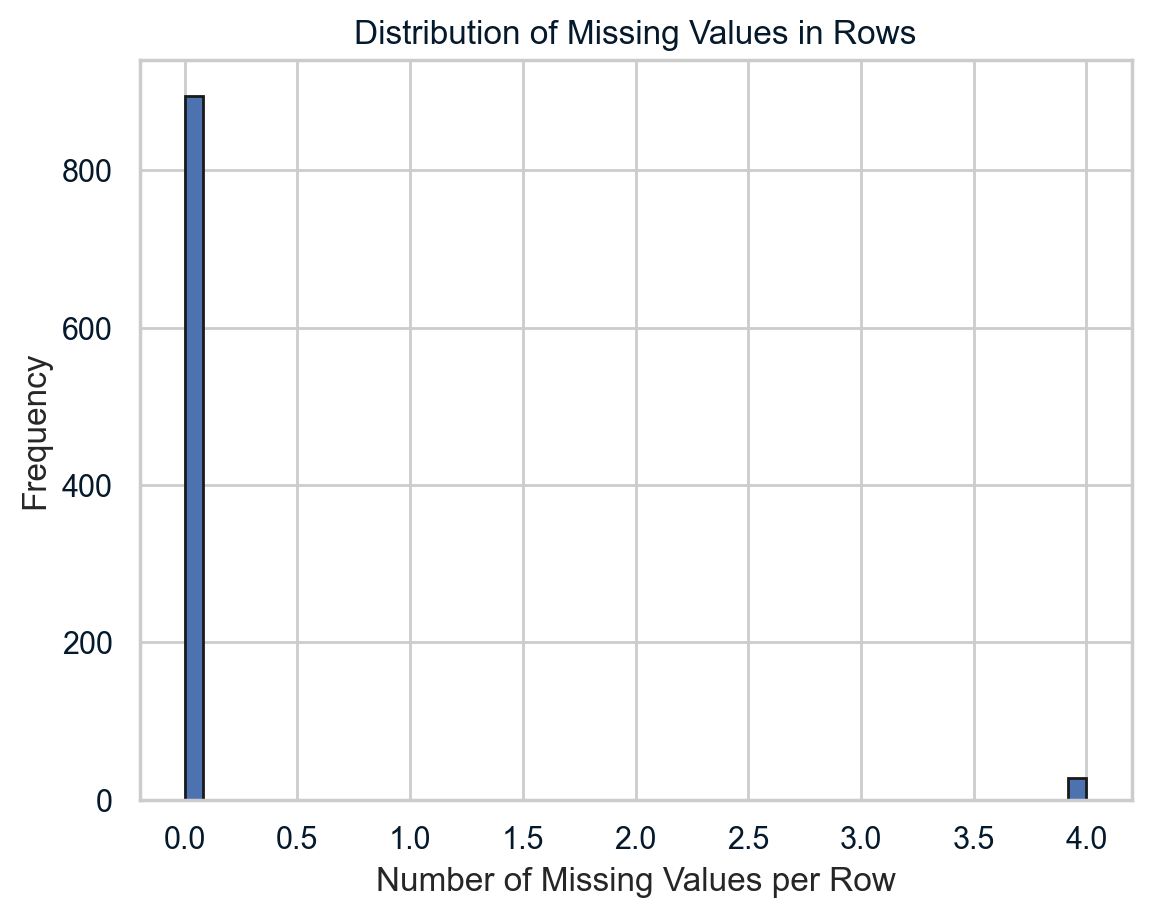

In [235]:
# Count missing values per row
missing_per_row = data.isnull().sum(axis=1)
# Visualize
plt.hist(missing_per_row, bins=50, edgecolor='k')
plt.xlabel('Number of Missing Values per Row')
plt.ylabel('Frequency')
plt.title('Distribution of Missing Values in Rows')
plt.show()

In [236]:
# Drop rows with more than 3 missing values
data = data[data.isnull().sum(axis=1) <= 3]

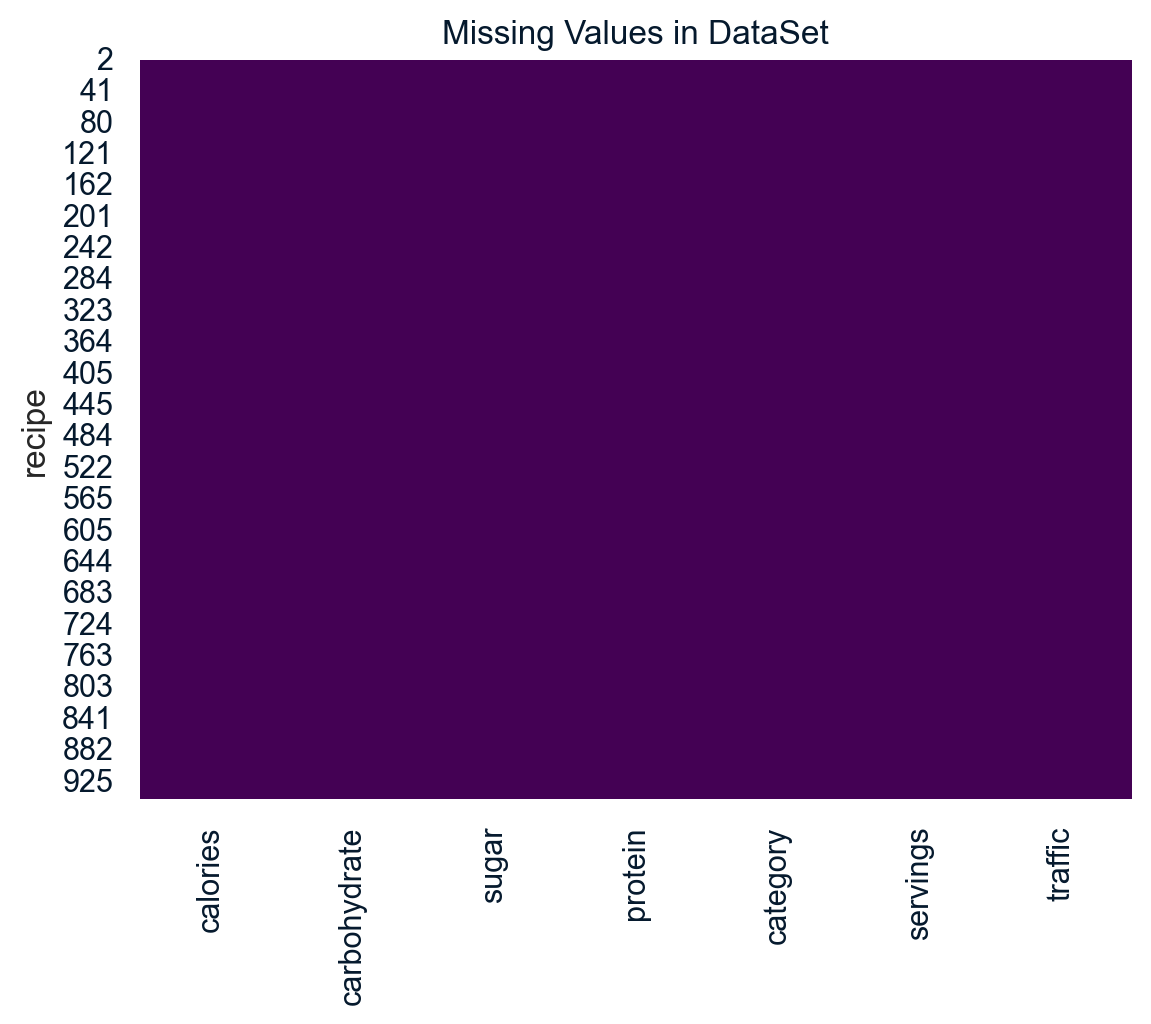

Percentage of Missing Values:
 calories        0.0
carbohydrate    0.0
sugar           0.0
protein         0.0
category        0.0
servings        0.0
traffic         0.0
dtype: float64


In [237]:
# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in DataSet")
plt.show()

# Percentage of missing values
missing_data = data.isnull().sum() / len(data) * 100
print("Percentage of Missing Values:\n", missing_data)

- From the 'Distribution of Missing Values' plot we can say, most of the rows don't have any missing values, a few of them have 4 missing values.
- So I dropped the rows with missing values greater than 4.
- Then I generated the missing value heatmap to ensure no missing values are left untreated.

In [238]:
data_bef =data.copy()
# Handling Outliers
def handle_outlier(df,col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

data_num = data.select_dtypes(include = ["float64", "int64"])

for column in data_num.columns:
    handle_outlier(data, column)

Outlier detection and treatment were applied to numerical variables using the IQR method. Categorical features were deemed outlier-free. The visualization of numerical data distributions using box plots revealed the presence of outliers, characterized by their location beyond the typical range represented by the box and whiskers.

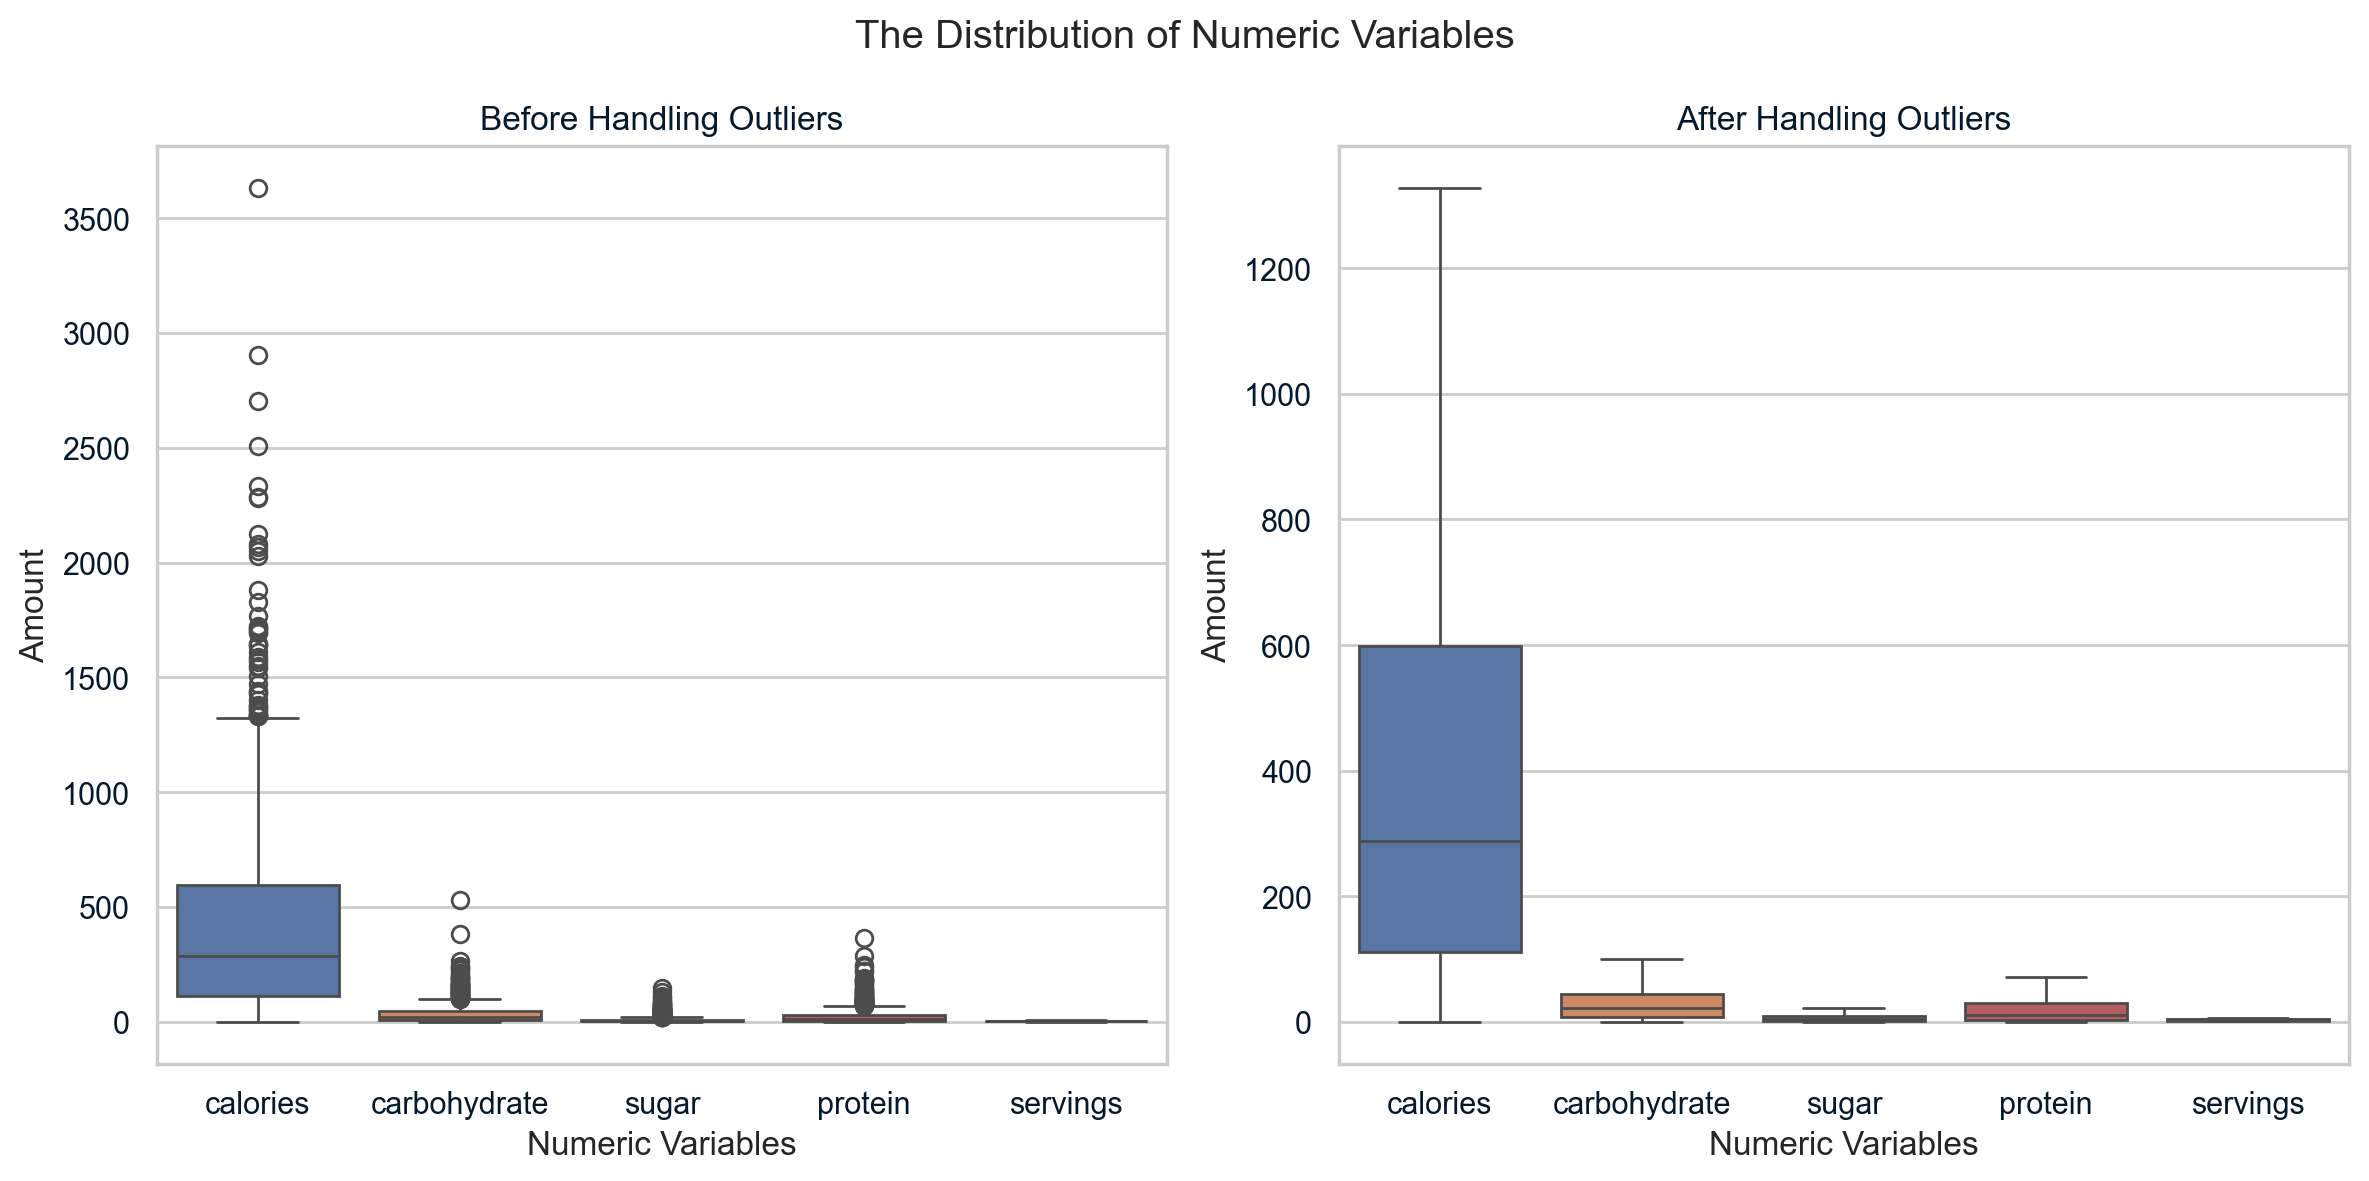

In [239]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data_bef,ax=axes[0])
sns.boxplot(data,ax=axes[1])
axes[0].set_title("Before Handling Outliers")
axes[1].set_title("After Handling Outliers")
fig.suptitle("The Distribution of Numeric Variables")
axes[0].set_xlabel("Numeric Variables")
axes[1].set_xlabel("Numeric Variables")
axes[0].set_ylabel("Amount")
axes[1].set_ylabel("Amount")
plt.tight_layout()
plt.show()

The presence of outliers in our data can potentially be explained by factors such as recipes with atypical ingredient quantities or larger serving sizes. The visualization of numerical features reveals a right-skewed distribution across all variables, a characteristic that persists even after the outlier handling process

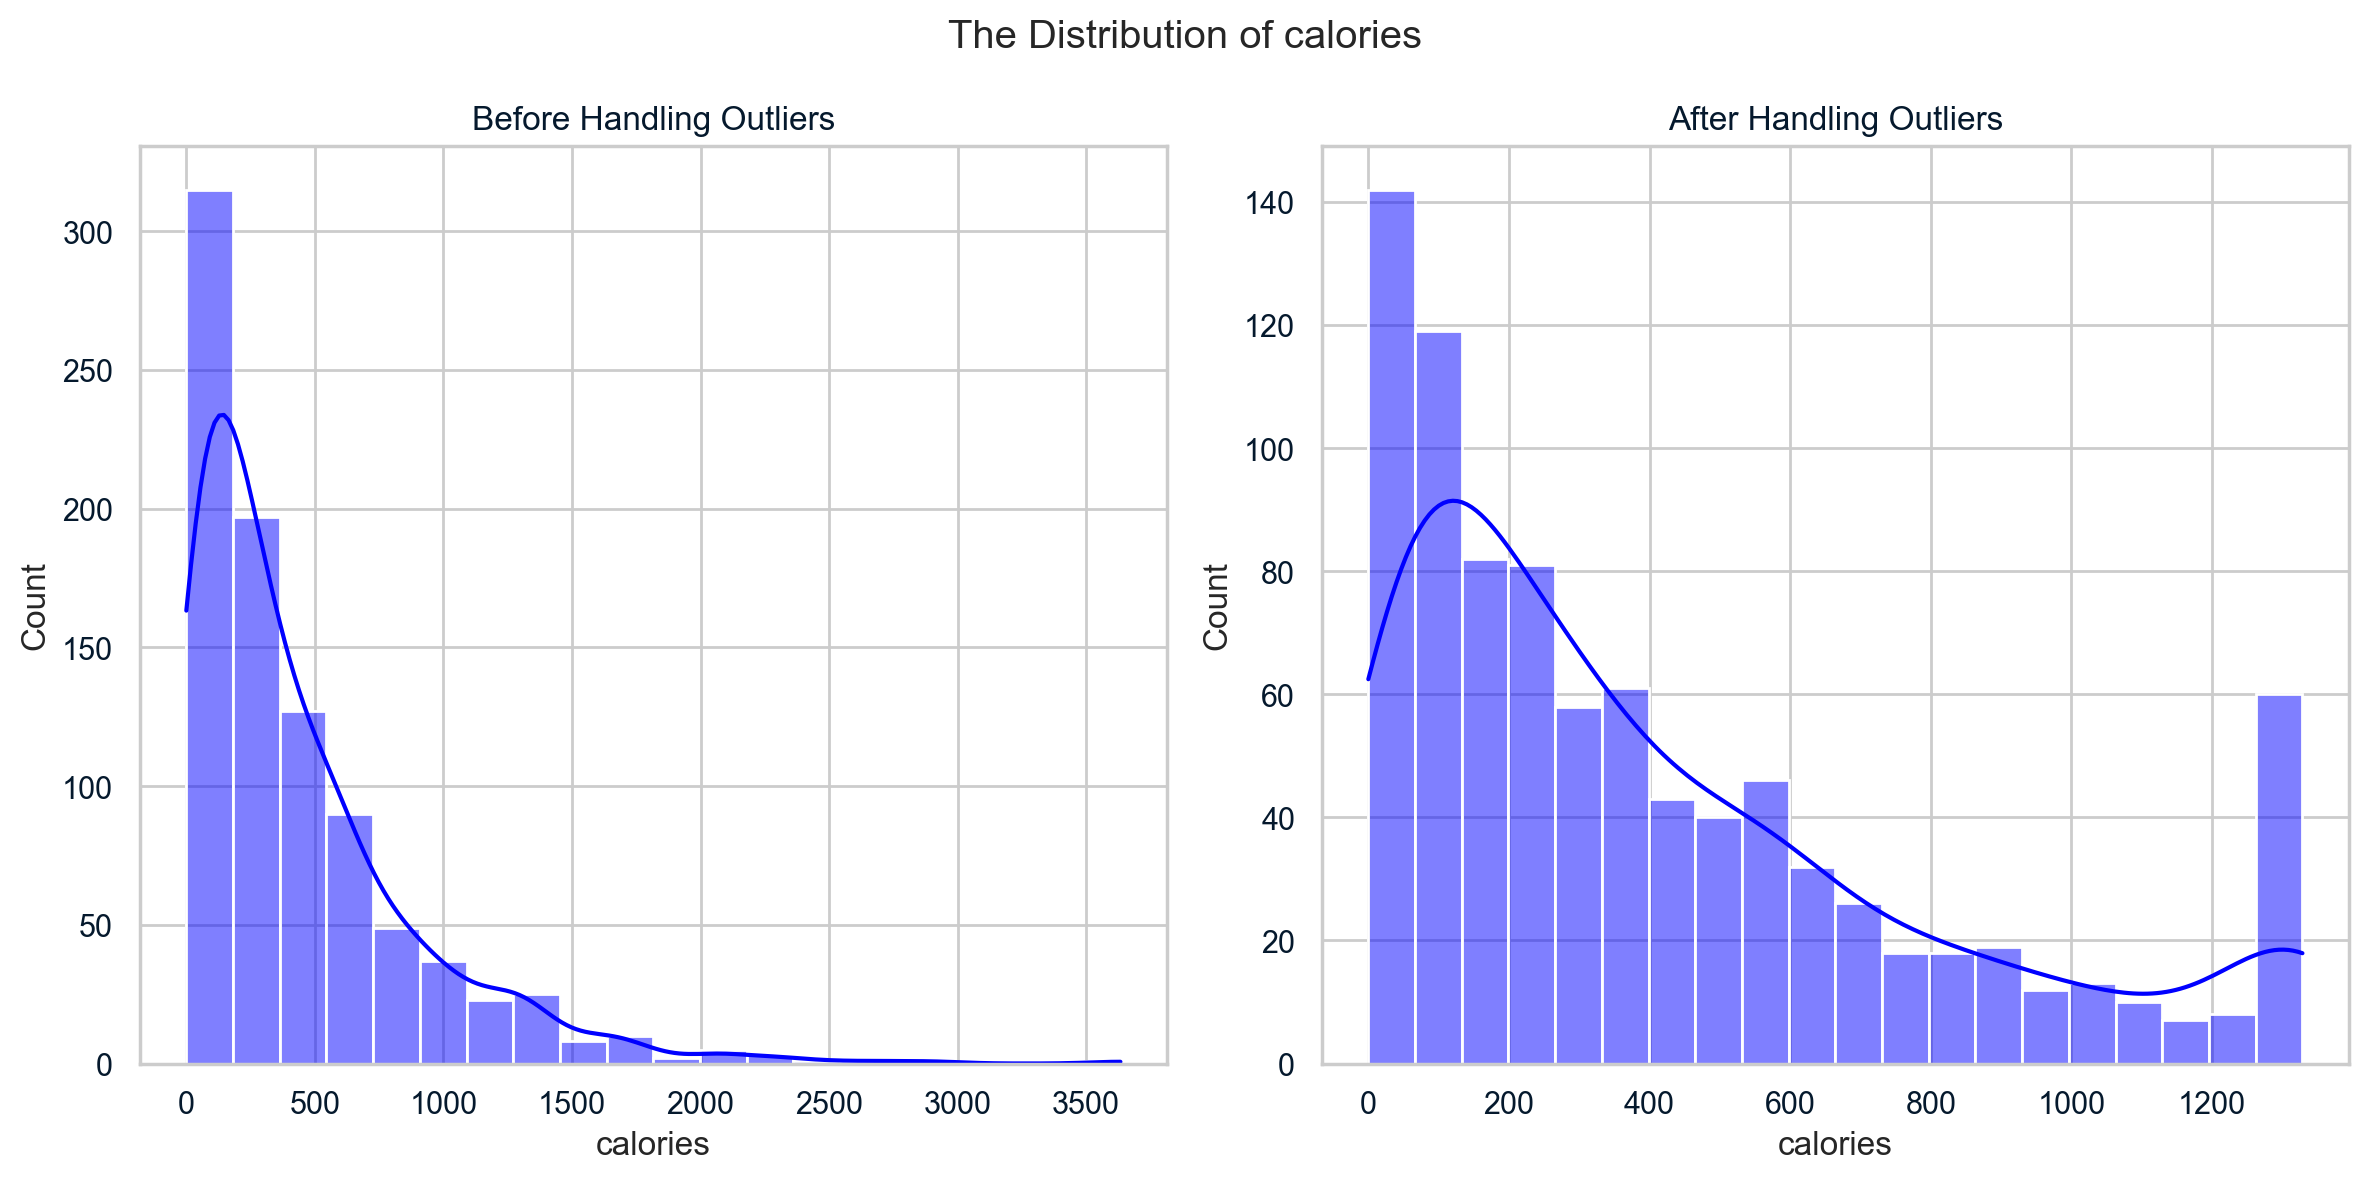

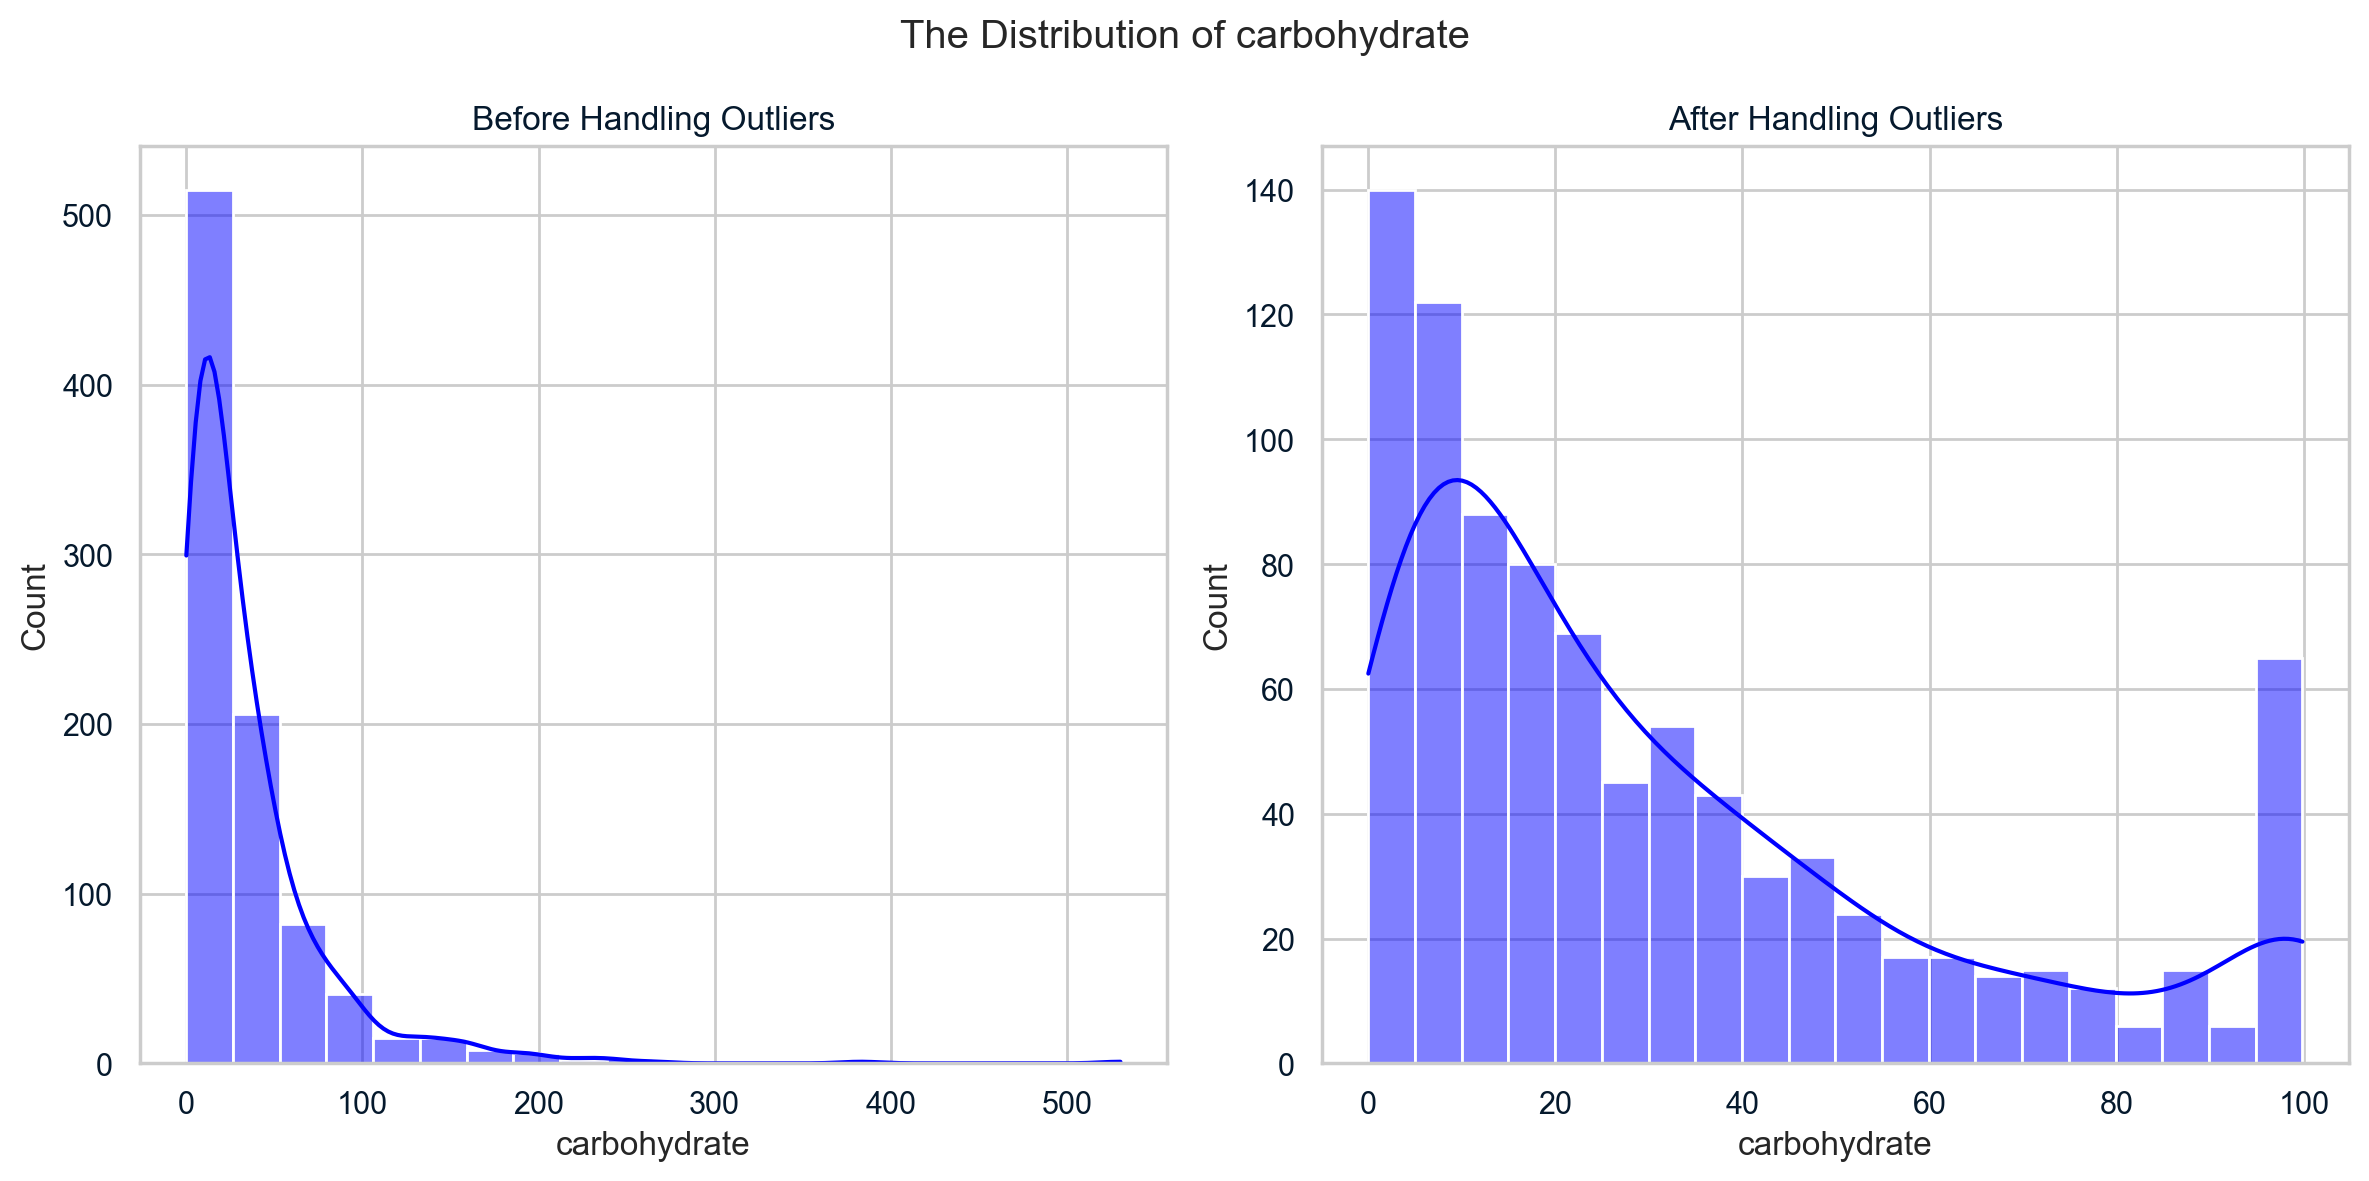

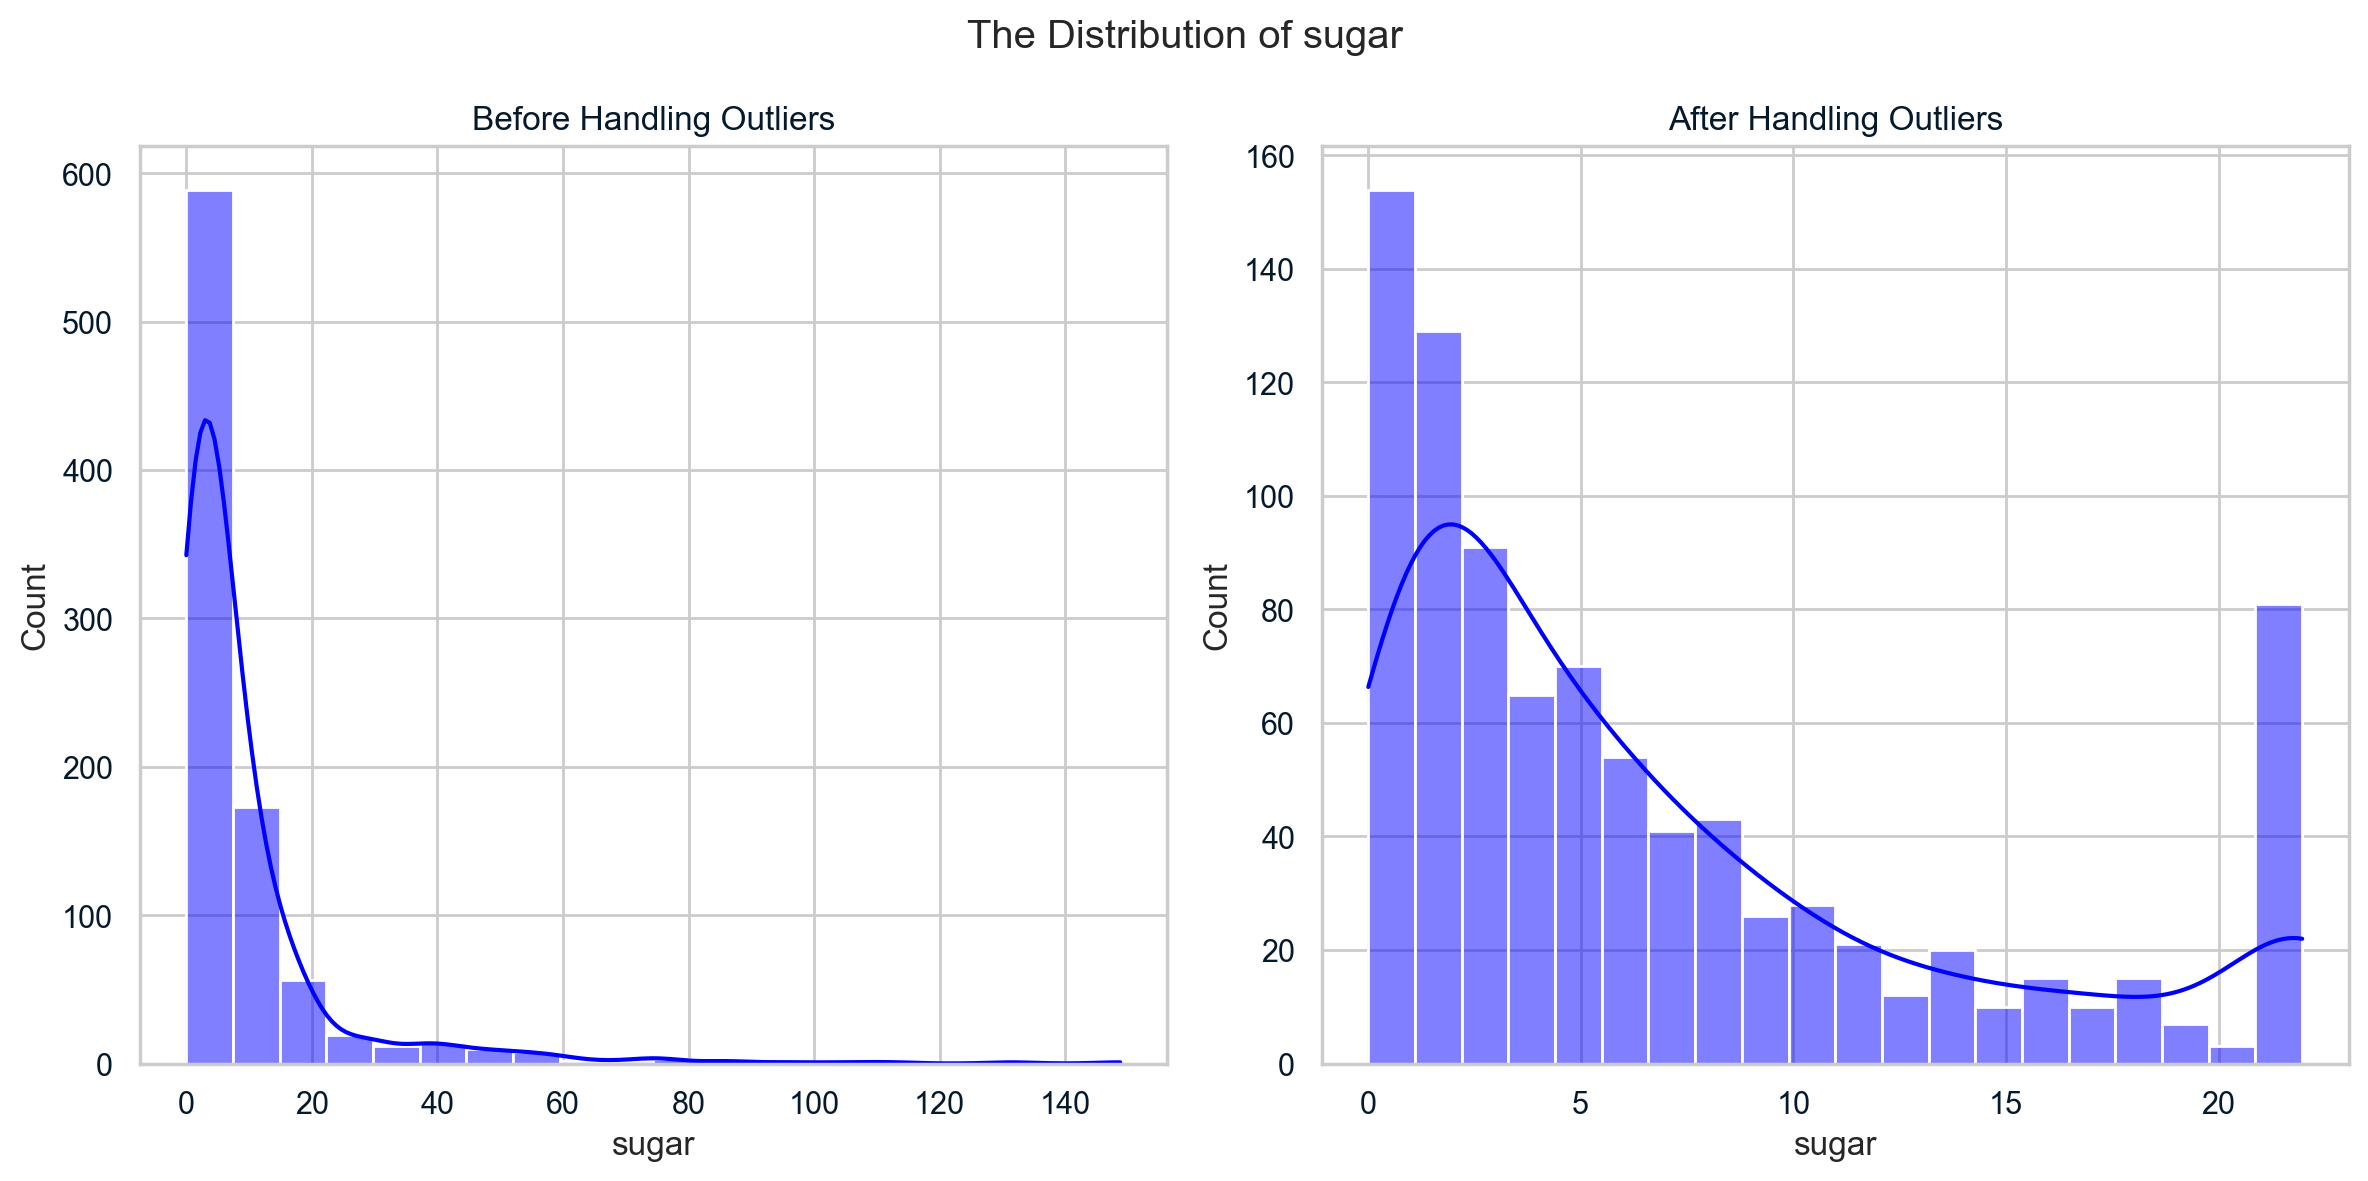

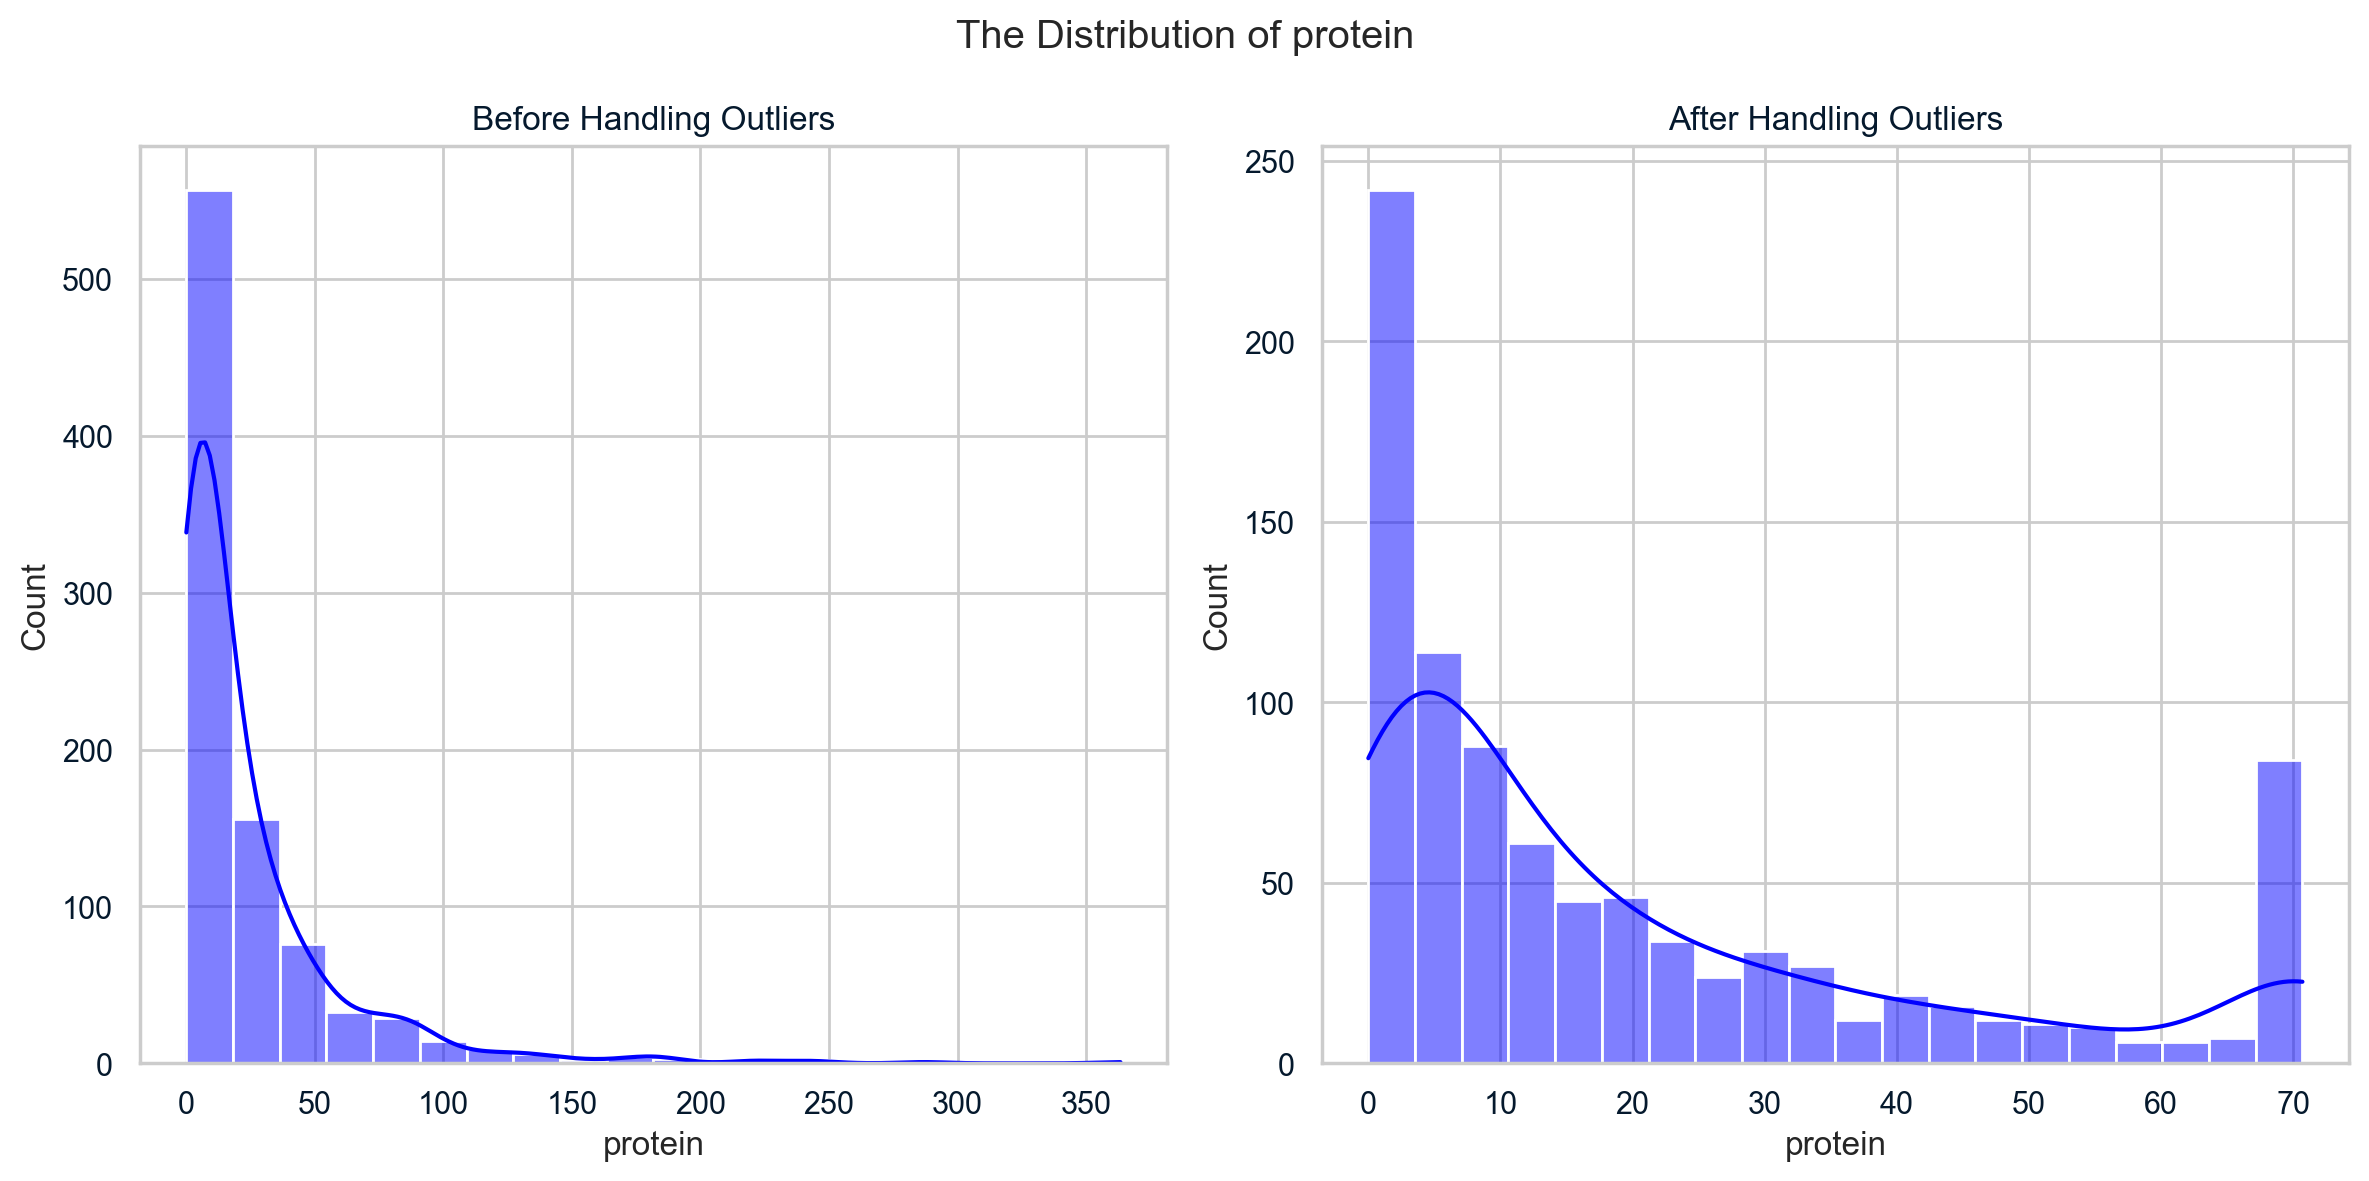

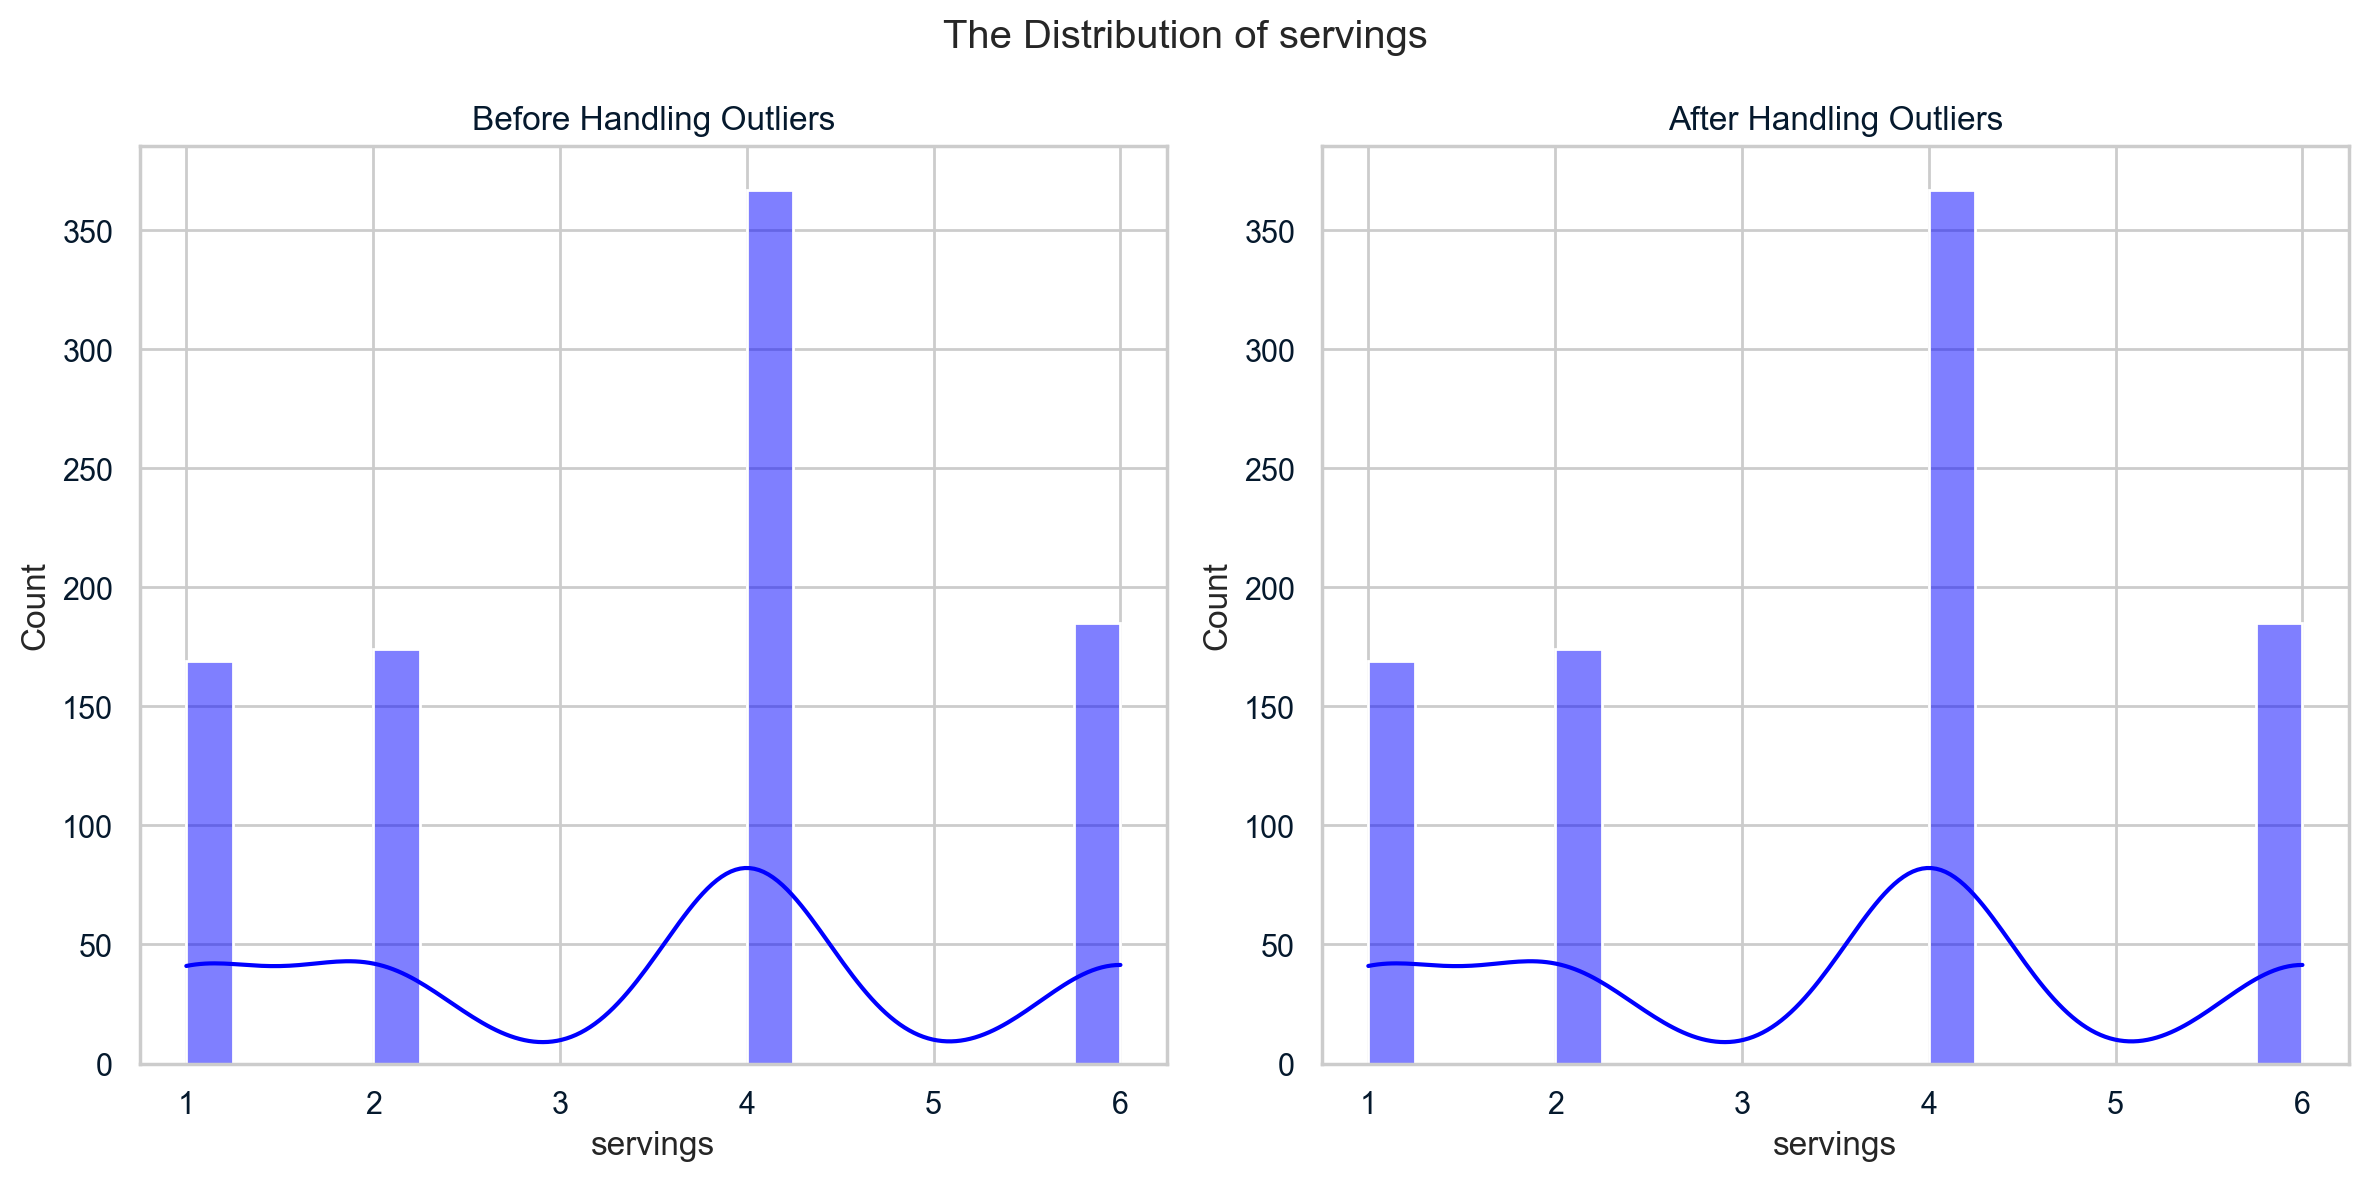

In [240]:
data_num = data.select_dtypes(include = ["float64", "int64"])
for col in data_num.columns:
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  sns.histplot(data_bef[col], kde=True, color='blue',ax=axes[0], bins=20)
  sns.histplot(data[col], kde=True, color='blue',ax=axes[1], bins=20)
  axes[0].set_title("Before Handling Outliers")
  axes[1].set_title("After Handling Outliers")
  fig.suptitle('The Distribution of '+col)
  plt.tight_layout()
  plt.show()

# Exploratory Analysis

In [241]:
data.head(10)

,calories,carbohydrate,sugar,protein,category,servings,traffic
recipe,,,,,,,
2,35.48,38.56,0.660,0.9200,Potato,4.0,High
3,914.28,42.68,3.090,2.8800,Breakfast,1.0,Low
4,97.03,30.56,21.965,0.0200,Beverages,4.0,High
5,27.05,1.85,0.800,0.5300,Beverages,4.0,Low
6,691.15,3.46,1.650,53.9300,One Dish Meal,2.0,High
7,183.94,47.95,9.750,46.7100,Chicken,4.0,Low
8,299.14,3.17,0.400,32.4000,Lunch/Snacks,4.0,Low
9,538.52,3.78,3.370,3.7900,Pork,6.0,High
10,248.28,48.54,3.990,70.7075,Chicken,2.0,Low


In [242]:
data.describe()

,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000
mean,413.361665,31.083430,6.834866,20.124053,3.458101
std,378.241095,28.945415,6.624471,22.111812,1.735979
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,110.430000,8.375000,1.690000,3.195000,2.000000
50%,288.550000,21.480000,4.550000,10.800000,4.000000
75%,597.650000,44.965000,9.800000,30.200000,4.000000
max,1328.480000,99.850000,21.965000,70.707500,6.000000


## **Target Variable - high_traffic**

Since we need to predict the high_traffic, the high_traffic variable would be our target variable. 

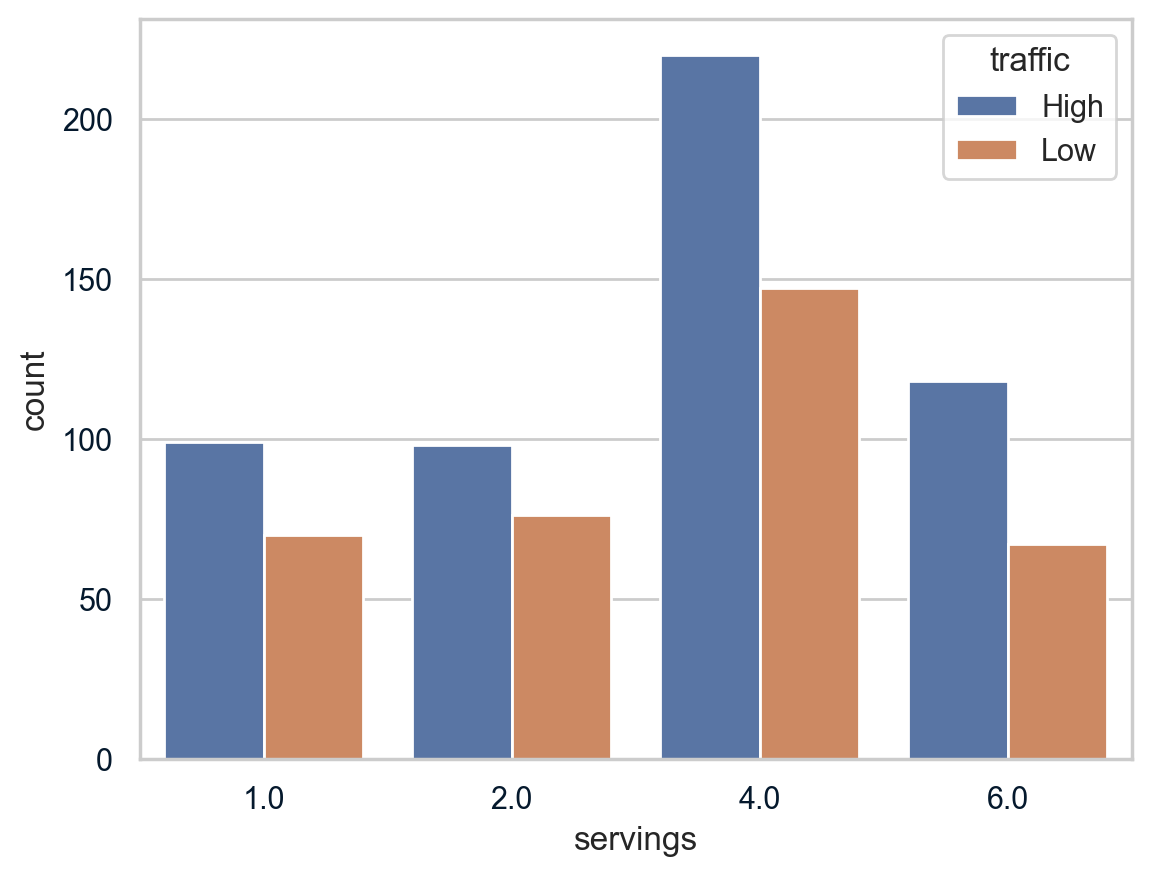

In [243]:
sns.countplot(data, x="servings", hue="traffic")
plt.show()

For each serving, the amount of recipes with high traffic are more than the amount of recipes with low traffic, so this feature doesn't have a big influence on target variable.

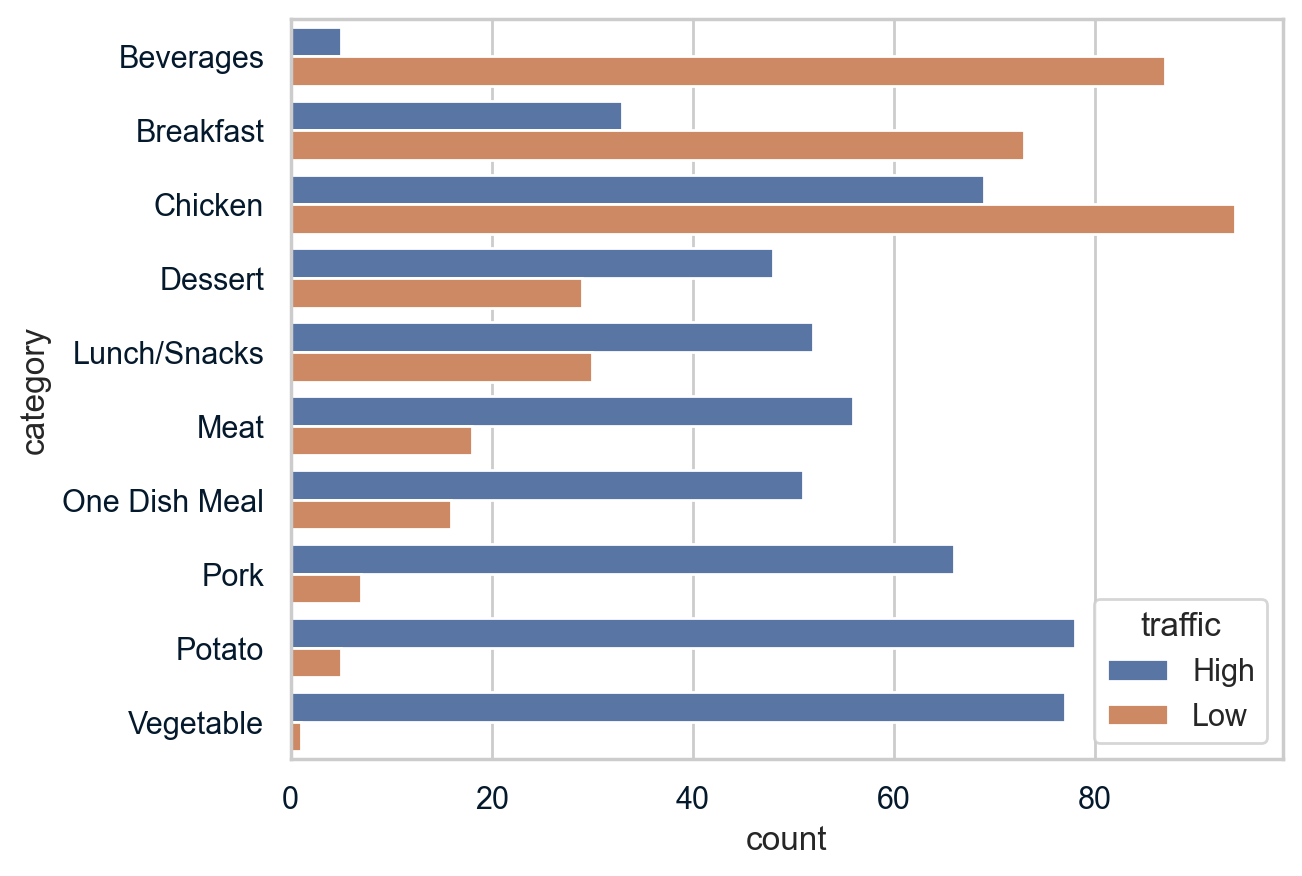

In [244]:
sns.countplot(data, y="category", hue="traffic")
plt.show()


- Potato, Pork and Vegetable categories have **a lot more recipes with high traffic** than with low traffic. 
- One Dish Meal, Lunch/Snacks, Meat, Dessert categories have just **more recipes with high traffic** than with low traffic. 

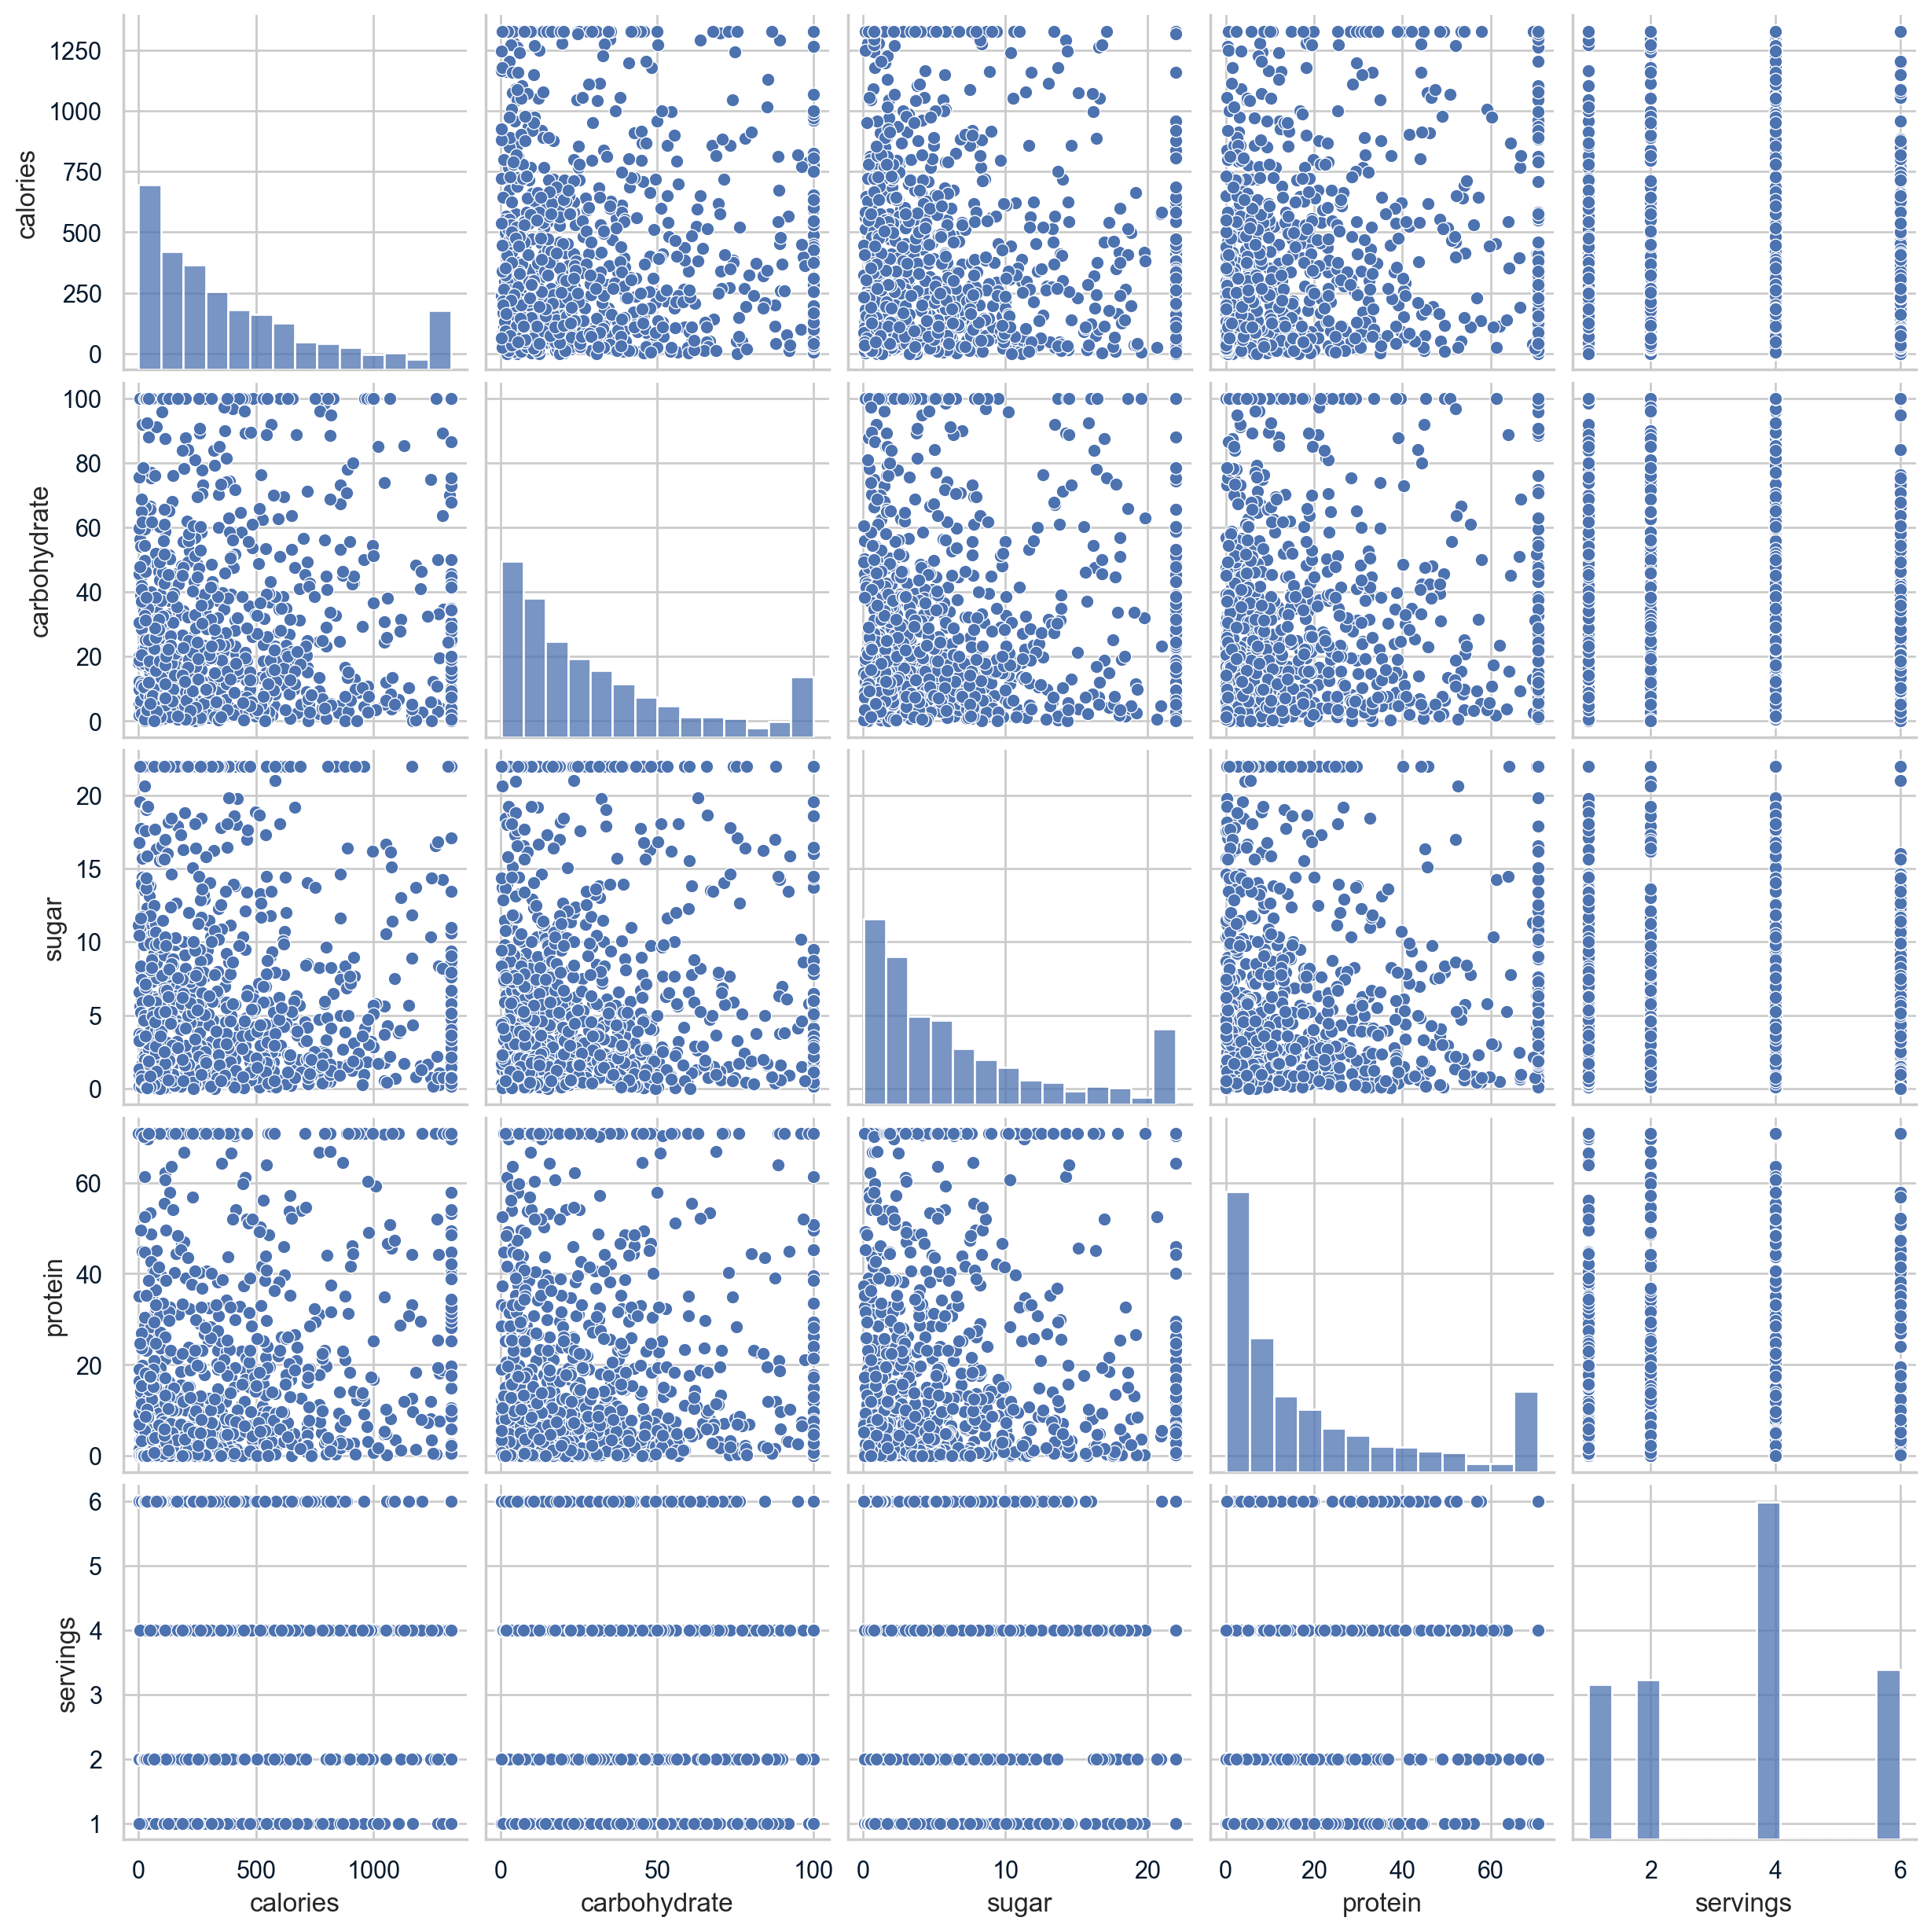

In [245]:
sns.pairplot(data=data)
plt.show()

From the pairplot we can say-
- There is a weak correaltion among numeric variables, this will be verify again using heatmap
- Numeric variables are rightly skewed 

From the heatmap below, we can conclude that there is a slight positive relationship between protien and calories

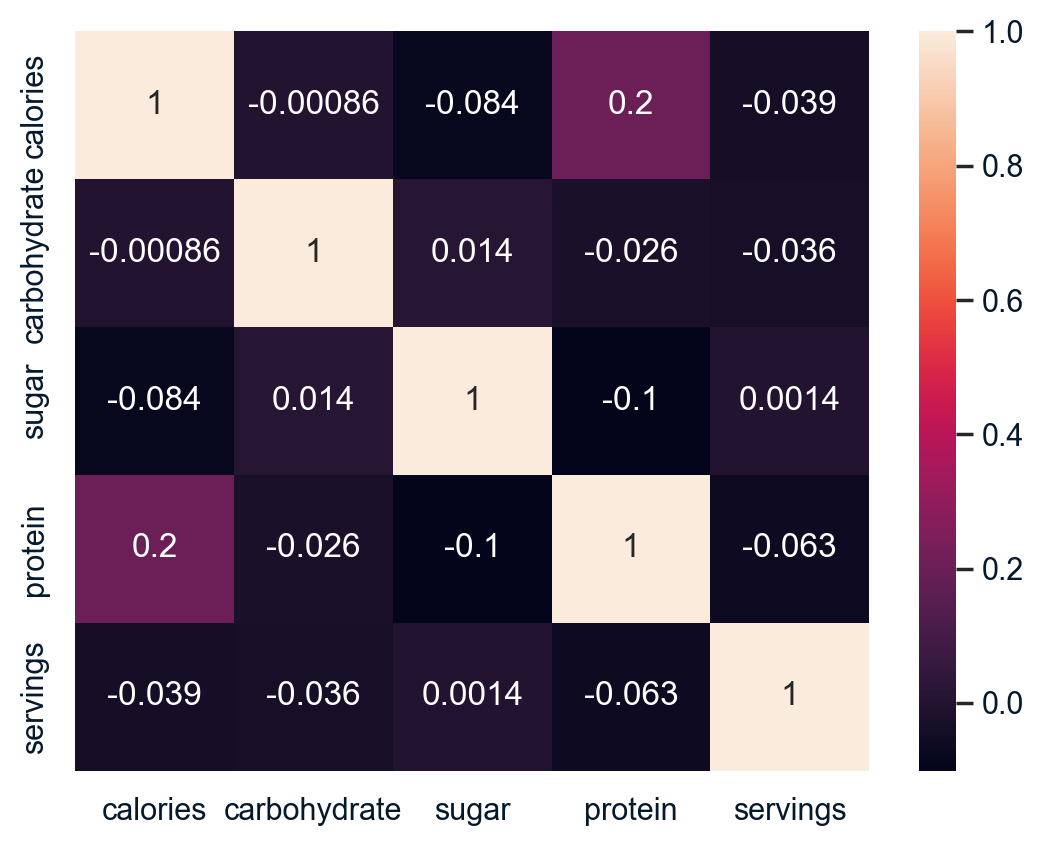

In [246]:
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)
plt.show();

# Model Development

Predicting high traffic levels constitutes a binary classification problem within the machine learning domain. We have selected Logistic Regression as our primary model due to its simplicity and interpretability, making it well-suited for binary classification tasks. Furthermore, we have included Random Forest as a comparative approach. Random Forest, an ensemble method leveraging multiple decision trees, offers enhanced accuracy and robustness against overfitting compared to a single decision tree classifier. Additionally, we have incorporated XGBoost (Extreme Gradient Boosting) into our analysis. XGBoost, another powerful ensemble method, is renowned for its high predictive accuracy and ability to handle complex relationships within the data.

In [247]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 

In [248]:
data = pd.get_dummies(data, columns=['category'])

In [249]:
data['servings'] = data['servings'].astype('int')
label_encoder = LabelEncoder()
data['traffic'] = label_encoder.fit_transform(data['traffic'])

In [250]:
columns_to_std = ['calories','carbohydrate', 'sugar', 'protein']

# Calculate standard deviation for the selected columns and add a new 'std' column
data['std'] = data[columns_to_std].apply(lambda row: np.std(row), axis=1)

In [251]:
column_order = ['calories',  'carbohydrate',   'sugar',  'protein','std' , 'servings','category_Beverages'  ,'category_Breakfast' , 'category_Chicken' ,  'category_Dessert' , 'category_Lunch/Snacks' ,'category_Meat',  'category_One Dish Meal',  'category_Pork',  'category_Potato', 'category_Vegetable' ,'traffic'] 
data = data[column_order]
data.head()

,calories,carbohydrate,sugar,protein,std,servings,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,traffic
recipe,,,,,,,,,,,,,,,,,
2,35.48,38.56,0.660,0.92,18.147933,4,0,0,0,0,0,0,0,0,1,0,0
3,914.28,42.68,3.090,2.88,389.210353,1,0,1,0,0,0,0,0,0,0,0,1
4,97.03,30.56,21.965,0.02,36.187104,4,1,0,0,0,0,0,0,0,0,0,0
5,27.05,1.85,0.800,0.53,11.264798,4,1,0,0,0,0,0,0,0,0,0,1
6,691.15,3.46,1.650,53.93,291.511236,2,0,0,0,0,0,0,1,0,0,0,0


In [252]:
# Define X variables and our target(y)
X = data.drop(["traffic"],axis=1).values
y = data["traffic"].values
print("X : ",X.shape," y : ",y.shape)

X :  (895, 16)  y :  (895,)


In [253]:
numeric_features = X[:, :5]

In [254]:
# Standardization
st_scaler = StandardScaler()
st_scaler.fit(numeric_features)
numeric_features_scaler = st_scaler.transform(numeric_features)
X_scaler = np.concatenate((numeric_features_scaler, X[:, 5:]), axis=1)

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size= 0.20, random_state=42)
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)

X_train =  (716, 16)  y_train =  (716,)
X_test  =  (179, 16)  y_test =  (179,)


The Steps for model developement :
*   Encoding categorical features
*   Additionally, I inserted a standard deviation column among the numerical columns for improved results, and our dataset now comprises 895 rows and 17 columns.
*   Scaling the numeric features
*   Split the data into a training set and a test set
*   Fit the data in the model

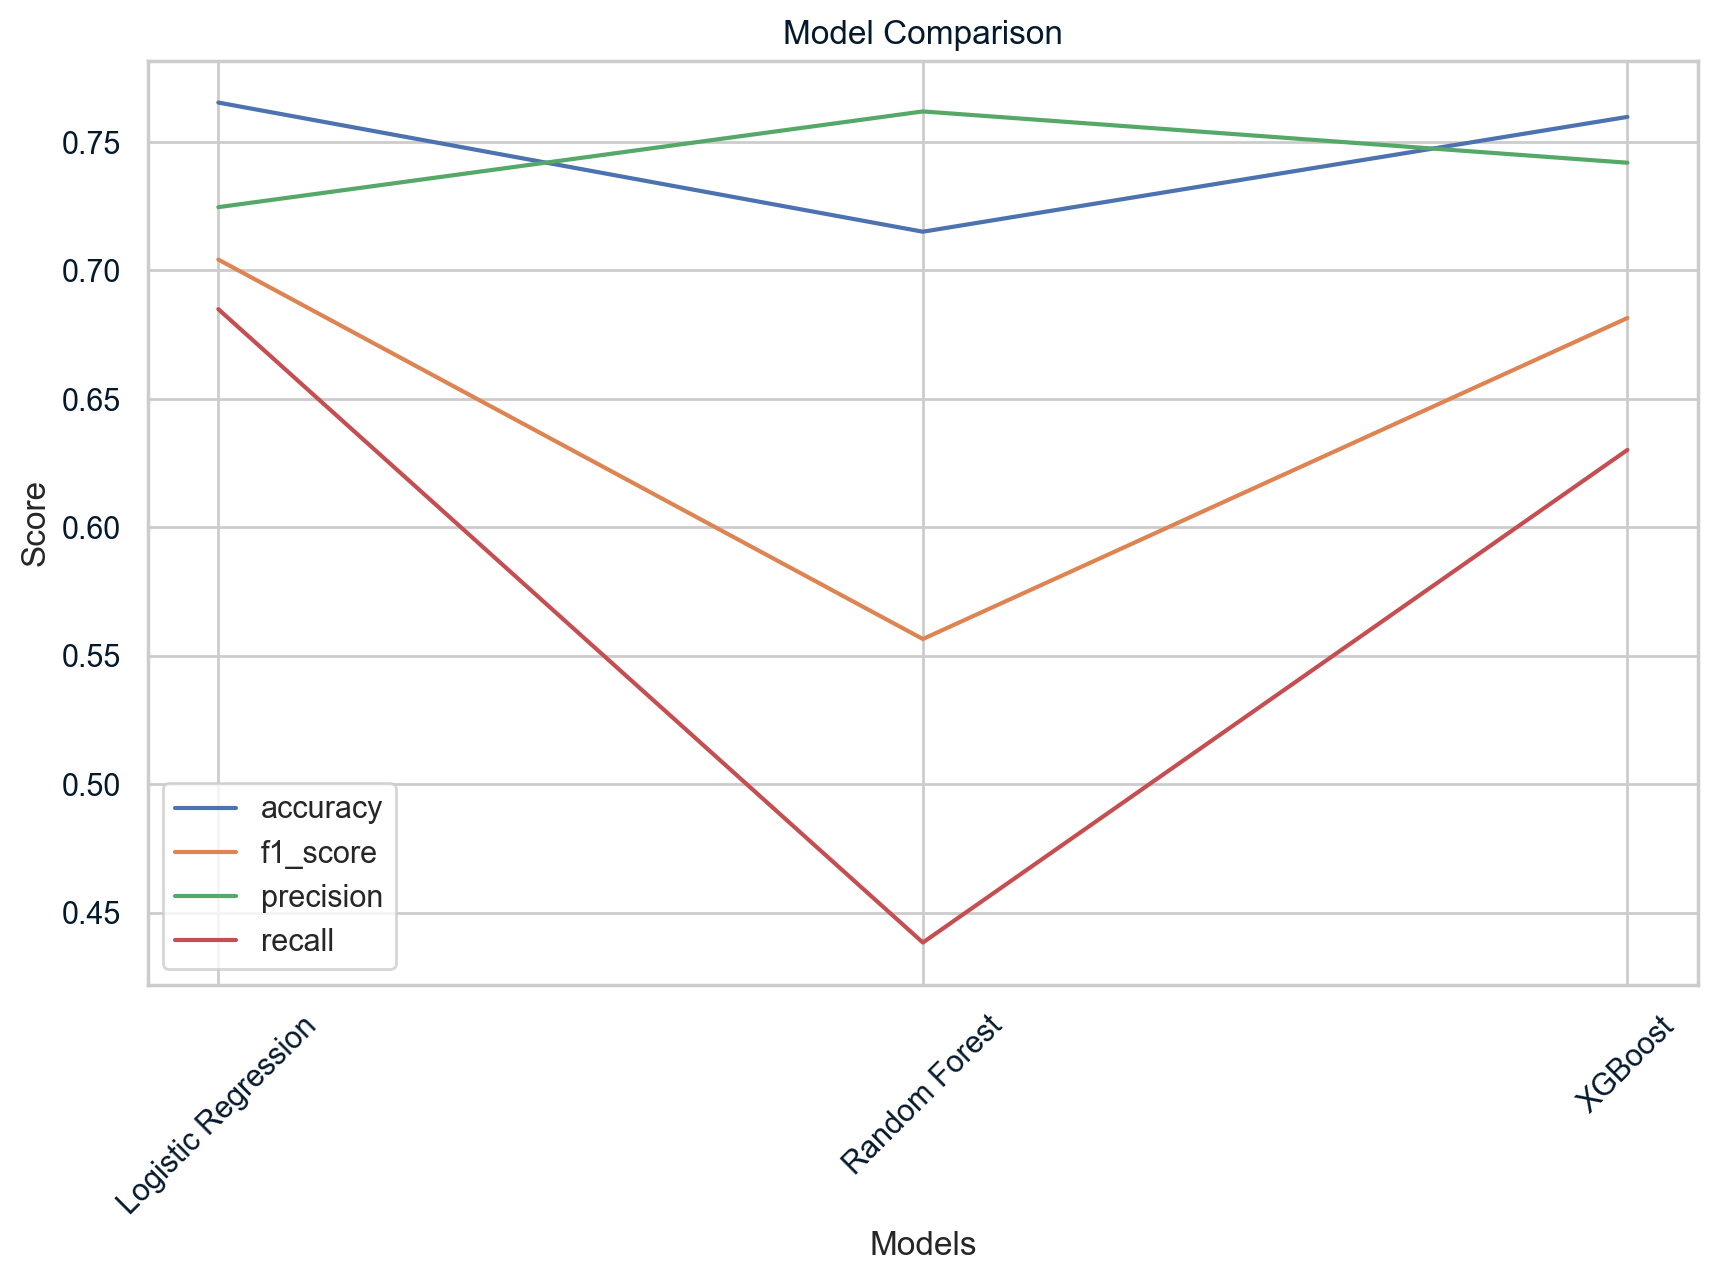

In [256]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Create a dictionary to store model results
model_results = {}

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=5),
    'Random Forest': RandomForestClassifier(n_estimators=20,max_depth=6,min_samples_split=3, random_state=42),
    'XGBoost': xgb.XGBClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=13,
        objective='binary:logistic',
        random_state=42,
        reg_lambda=0.2,  # L2 regularization
        reg_alpha=0.0  # L1 regularization
    )
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results
    model_results[model_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall
    }

# Create a DataFrame from the results
results_df = pd.DataFrame(model_results).T

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
for metric in ['accuracy', 'f1_score', 'precision', 'recall']:
    ax.plot(results_df[metric], label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.legend()
plt.xticks(rotation=45)
plt.show()


# Model Evaluation

In [257]:
# Print results
print(results_df)

                     accuracy  f1_score  precision    recall
Logistic Regression  0.765363  0.704225   0.724638  0.684932
Random Forest        0.715084  0.556522   0.761905  0.438356
XGBoost              0.759777  0.681481   0.741935  0.630137


**Overall Performance:**
- Logistic Regression and XGBoost appear to have a relatively close performance across all metrics.
- Random Forest seems to underperform compared to the other two models, particularly in terms of recall and .

**Metric-wise Analysis:**
- Accuracy: Logistic Regression and XGBoost show comparable accuracy, with a slight edge for Logistic Regression.
- F1-score: Logistic Regression achieves the highest F1-score, indicating a good balance between precision and recall.
- Precision: Logistic Regression and XGBoost have similar precision scores, while Random Forest exhibits Highest precision.
- Recall: Logistic Regression demonstrates the highest recall, suggesting it's better at identifying true positive cases.

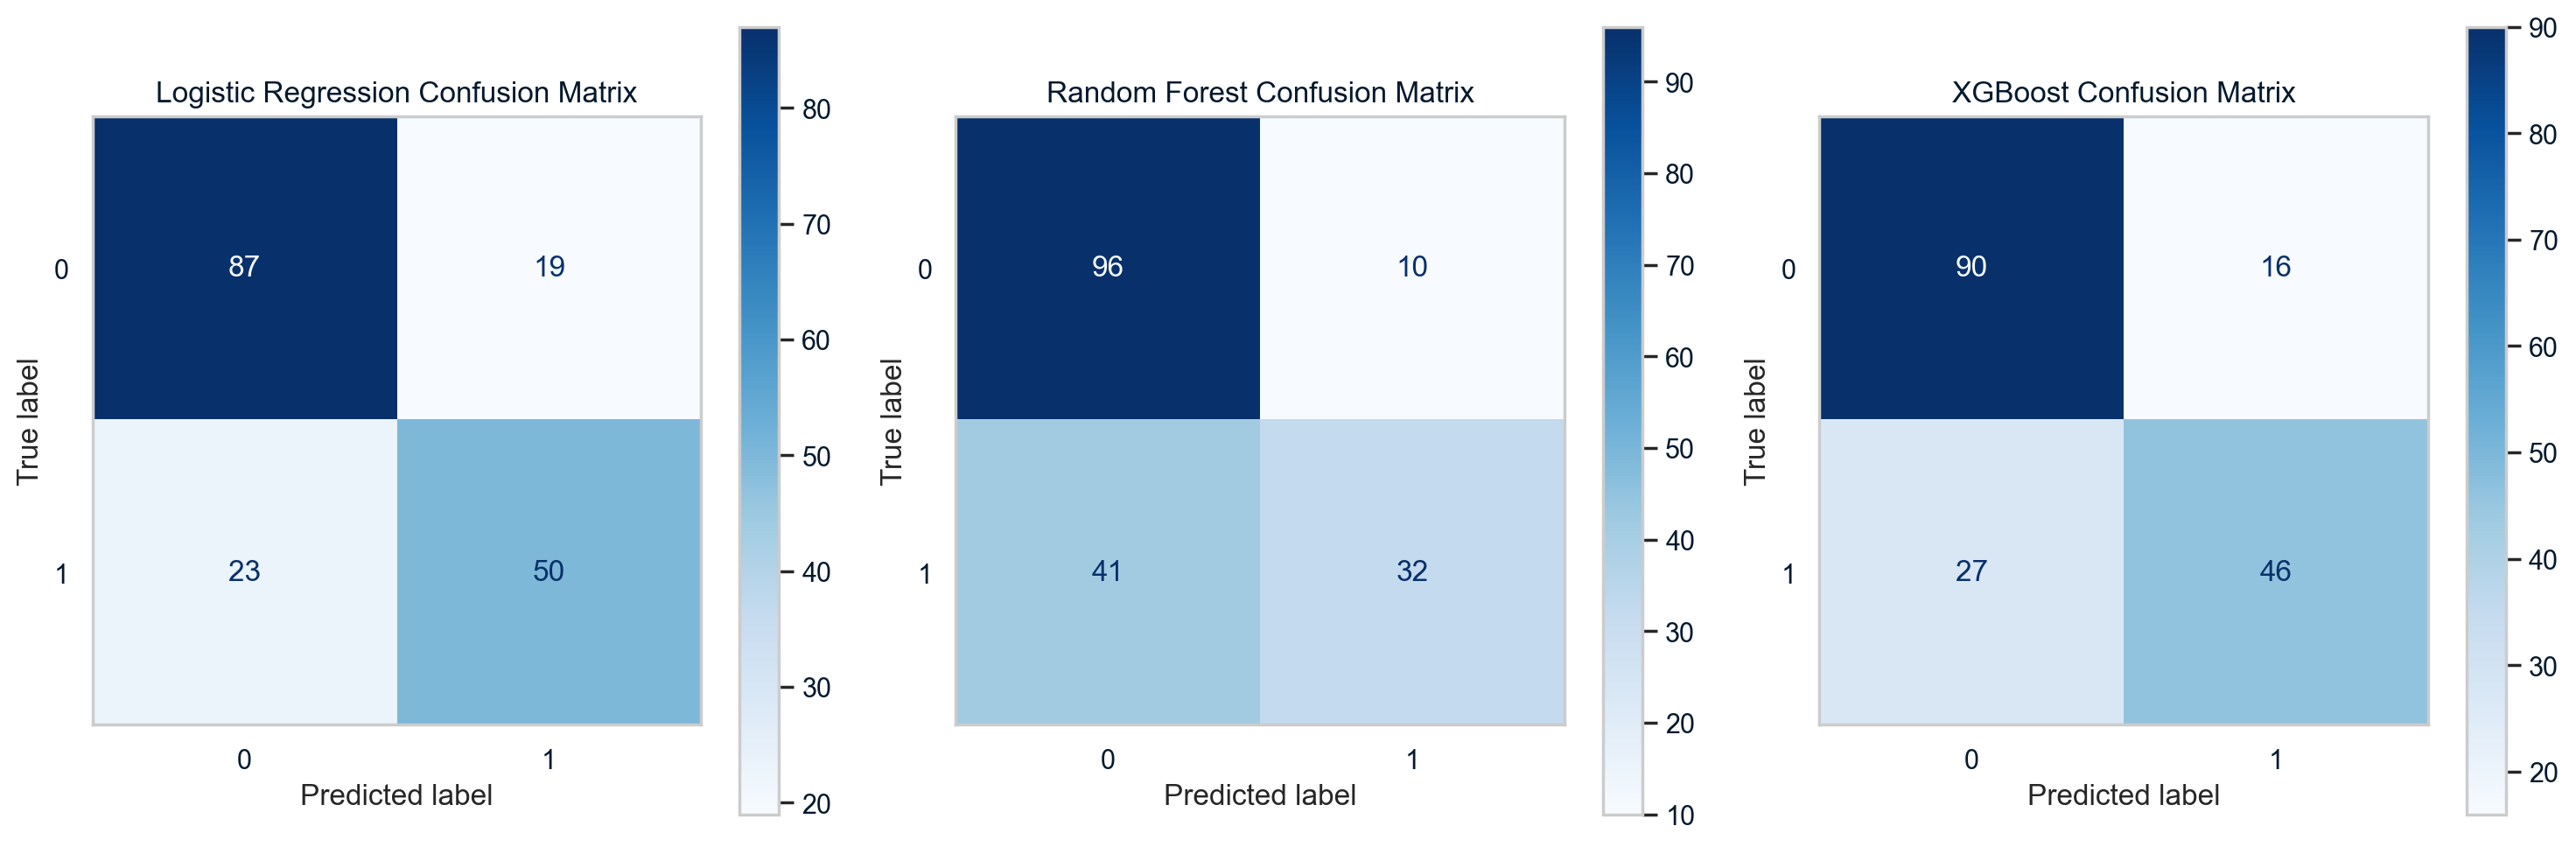

In [258]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=5),
    'Random Forest': RandomForestClassifier(n_estimators=20, max_depth=6, min_samples_split=3, random_state=42),
    'XGBoost': xgb.XGBClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=13,
        objective='binary:logistic',
        random_state=42,
        reg_lambda=0.2,  # L2 regularization
        reg_alpha=0.0  # L1 regularization
    )
}

# Create subplots for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through models and plot confusion matrices
for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(ax=axes[i], cmap=plt.cm.Blues)
    axes[i].set_title(f'{model_name} Confusion Matrix')
    # Remove grid lines from the current subplot
    axes[i].grid(False)

plt.tight_layout()
plt.show()

**Observation:**

All three models seem to be performing reasonably well, with a majority of predictions falling into the correct classes. The matrices show a clear diagonal pattern, indicating that the models are generally accurate in their predictions.

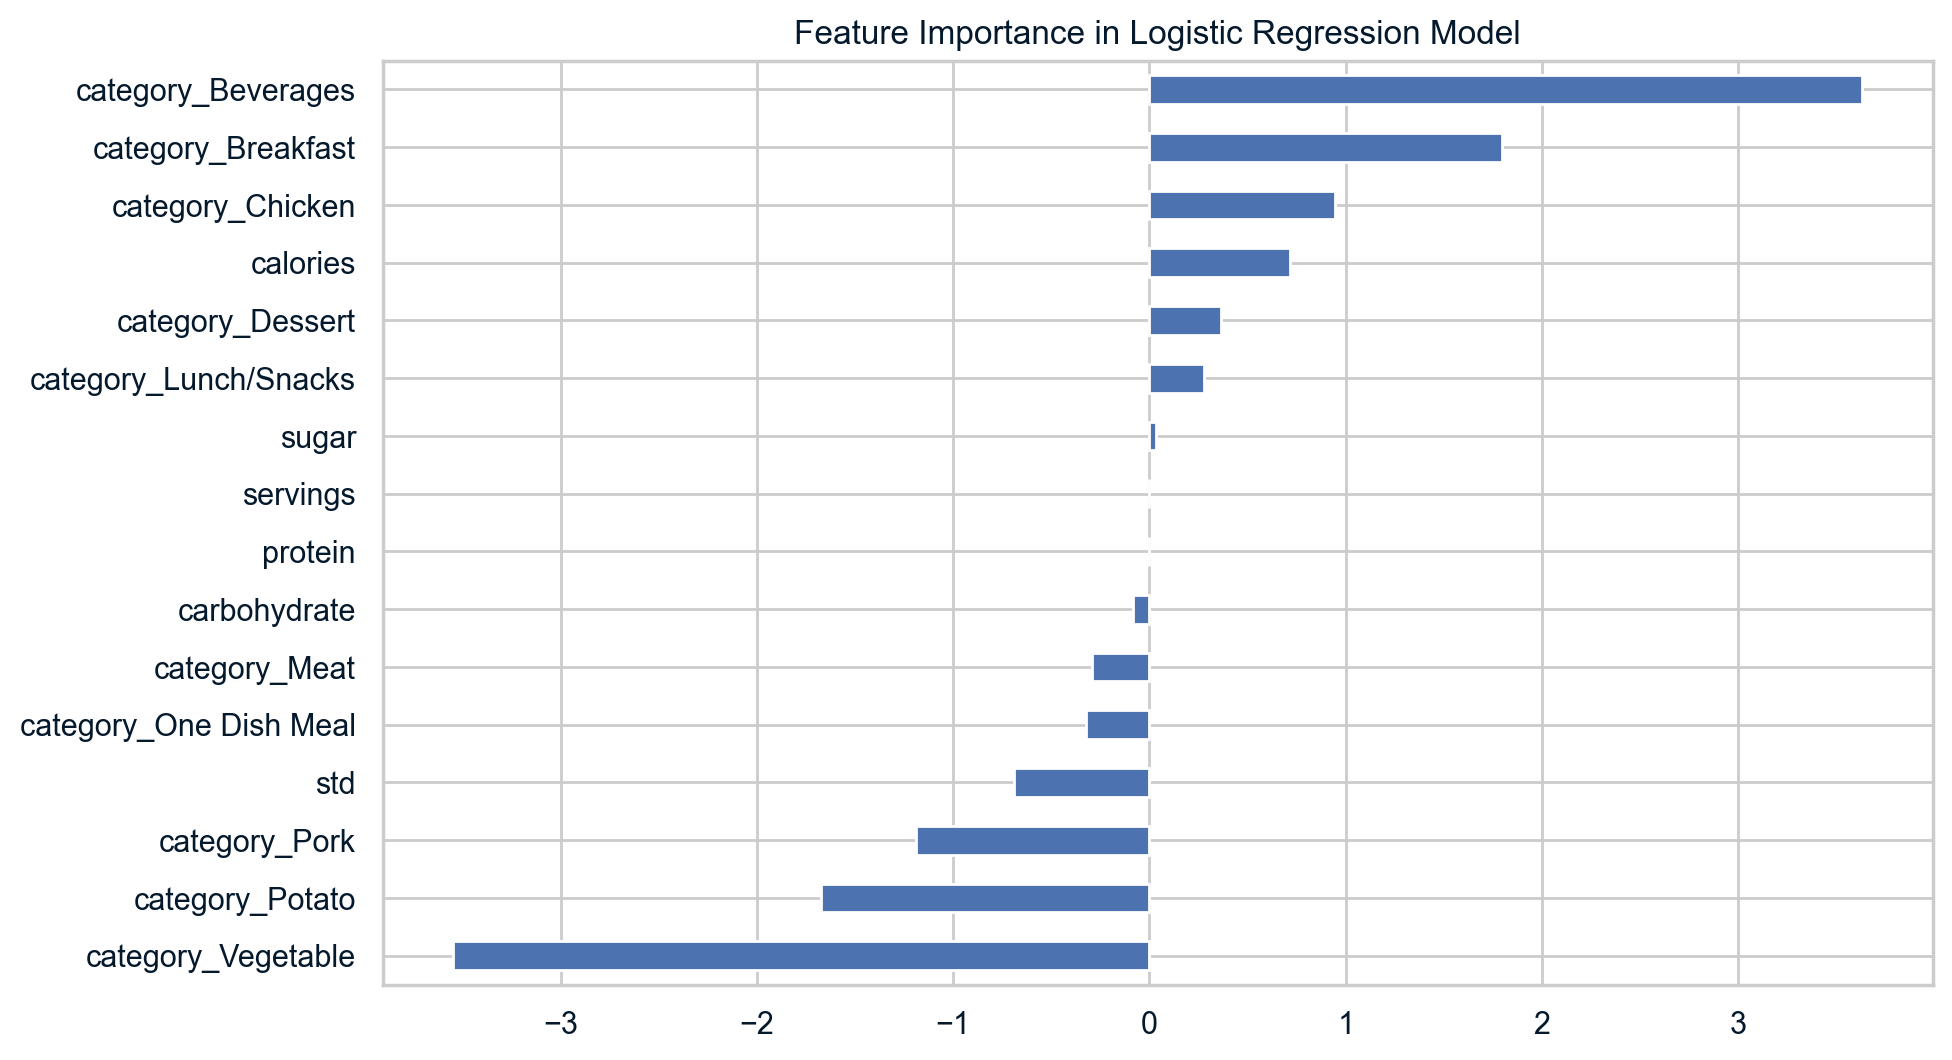

In [259]:
logistic_model = LogisticRegression(max_iter=1000, C=5)
logistic_model.fit(X_train, y_train)
# Feature Importance
importances = pd.Series(logistic_model.coef_[0],index=column_order[:-1])
sorted_importances=importances.sort_values()
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

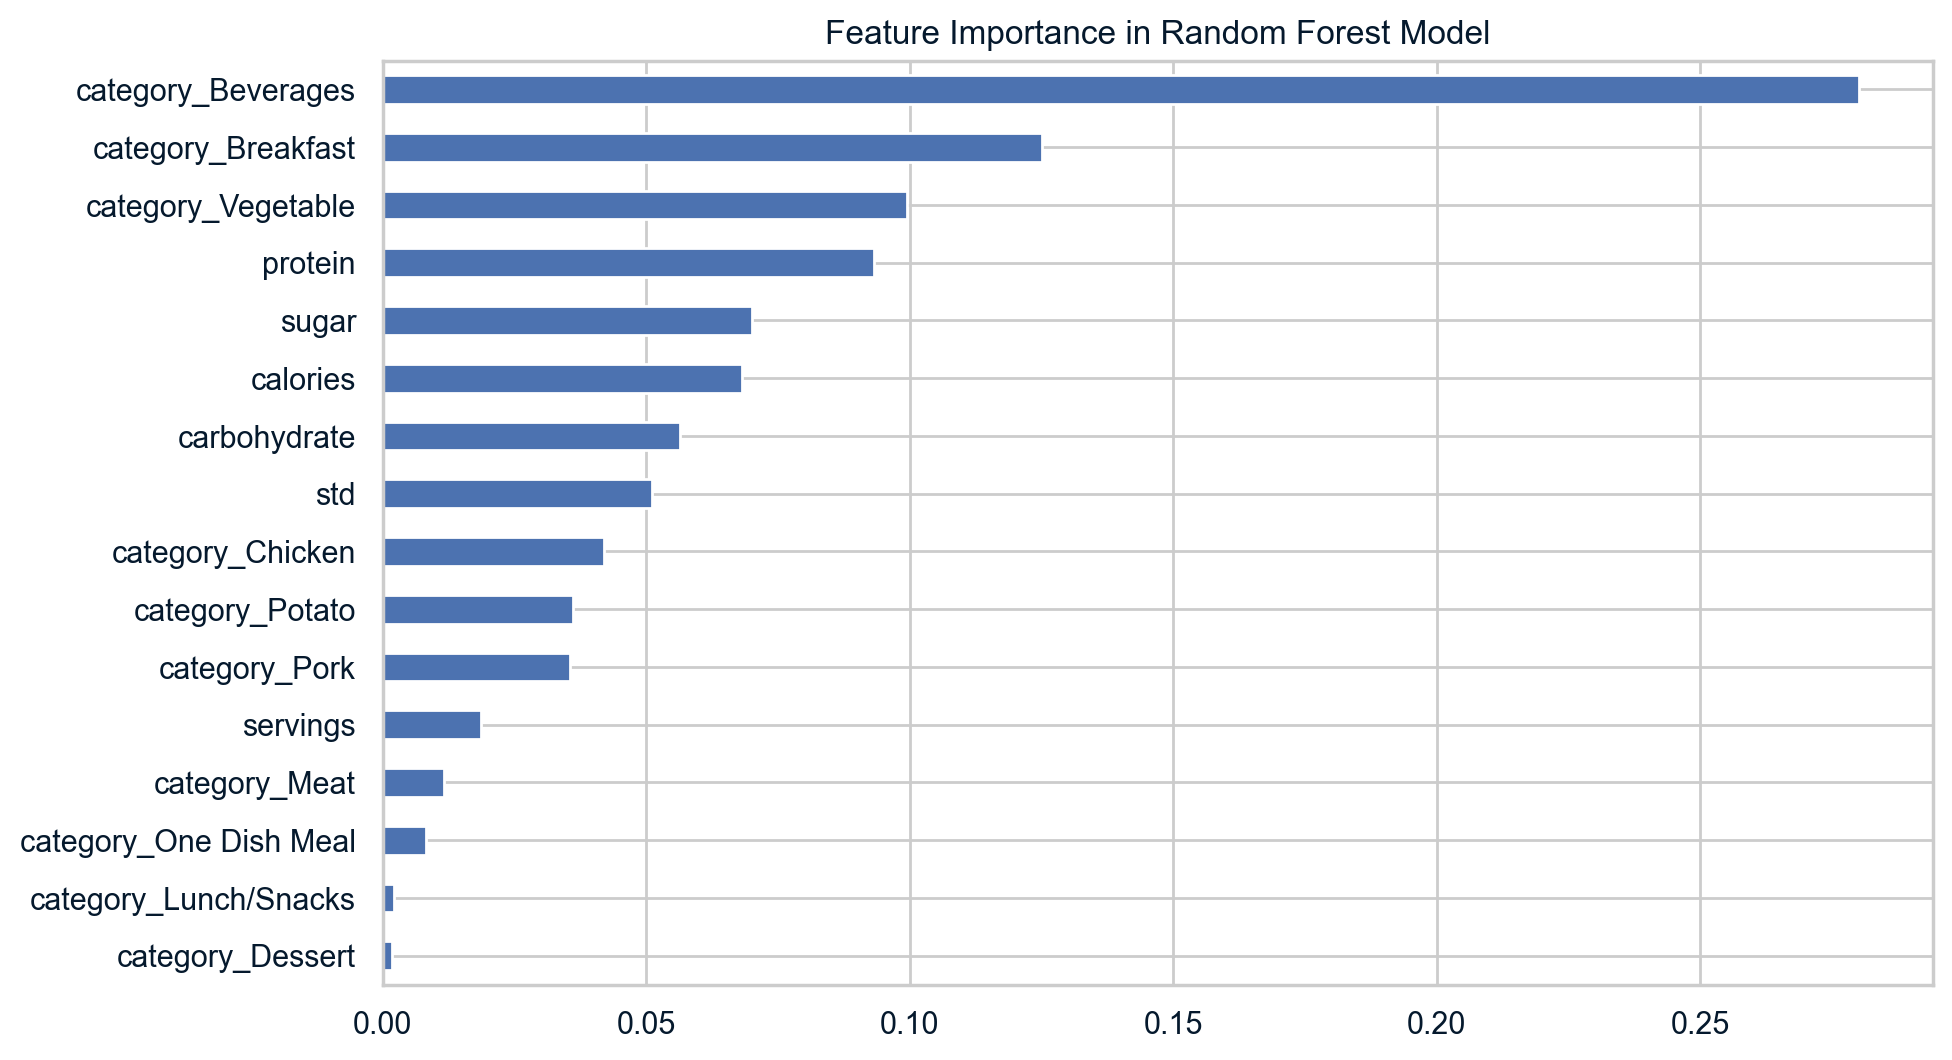

In [260]:
random_forest_model = RandomForestClassifier(n_estimators=20, max_depth=6, min_samples_split=3, random_state=42)
random_forest_model.fit(X_train, y_train)
# Feature Importance
importances = pd.Series(random_forest_model.feature_importances_,index=column_order[:-1])
sorted_importances=importances.sort_values()
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.title('Feature Importance in Random Forest Model')
plt.show()

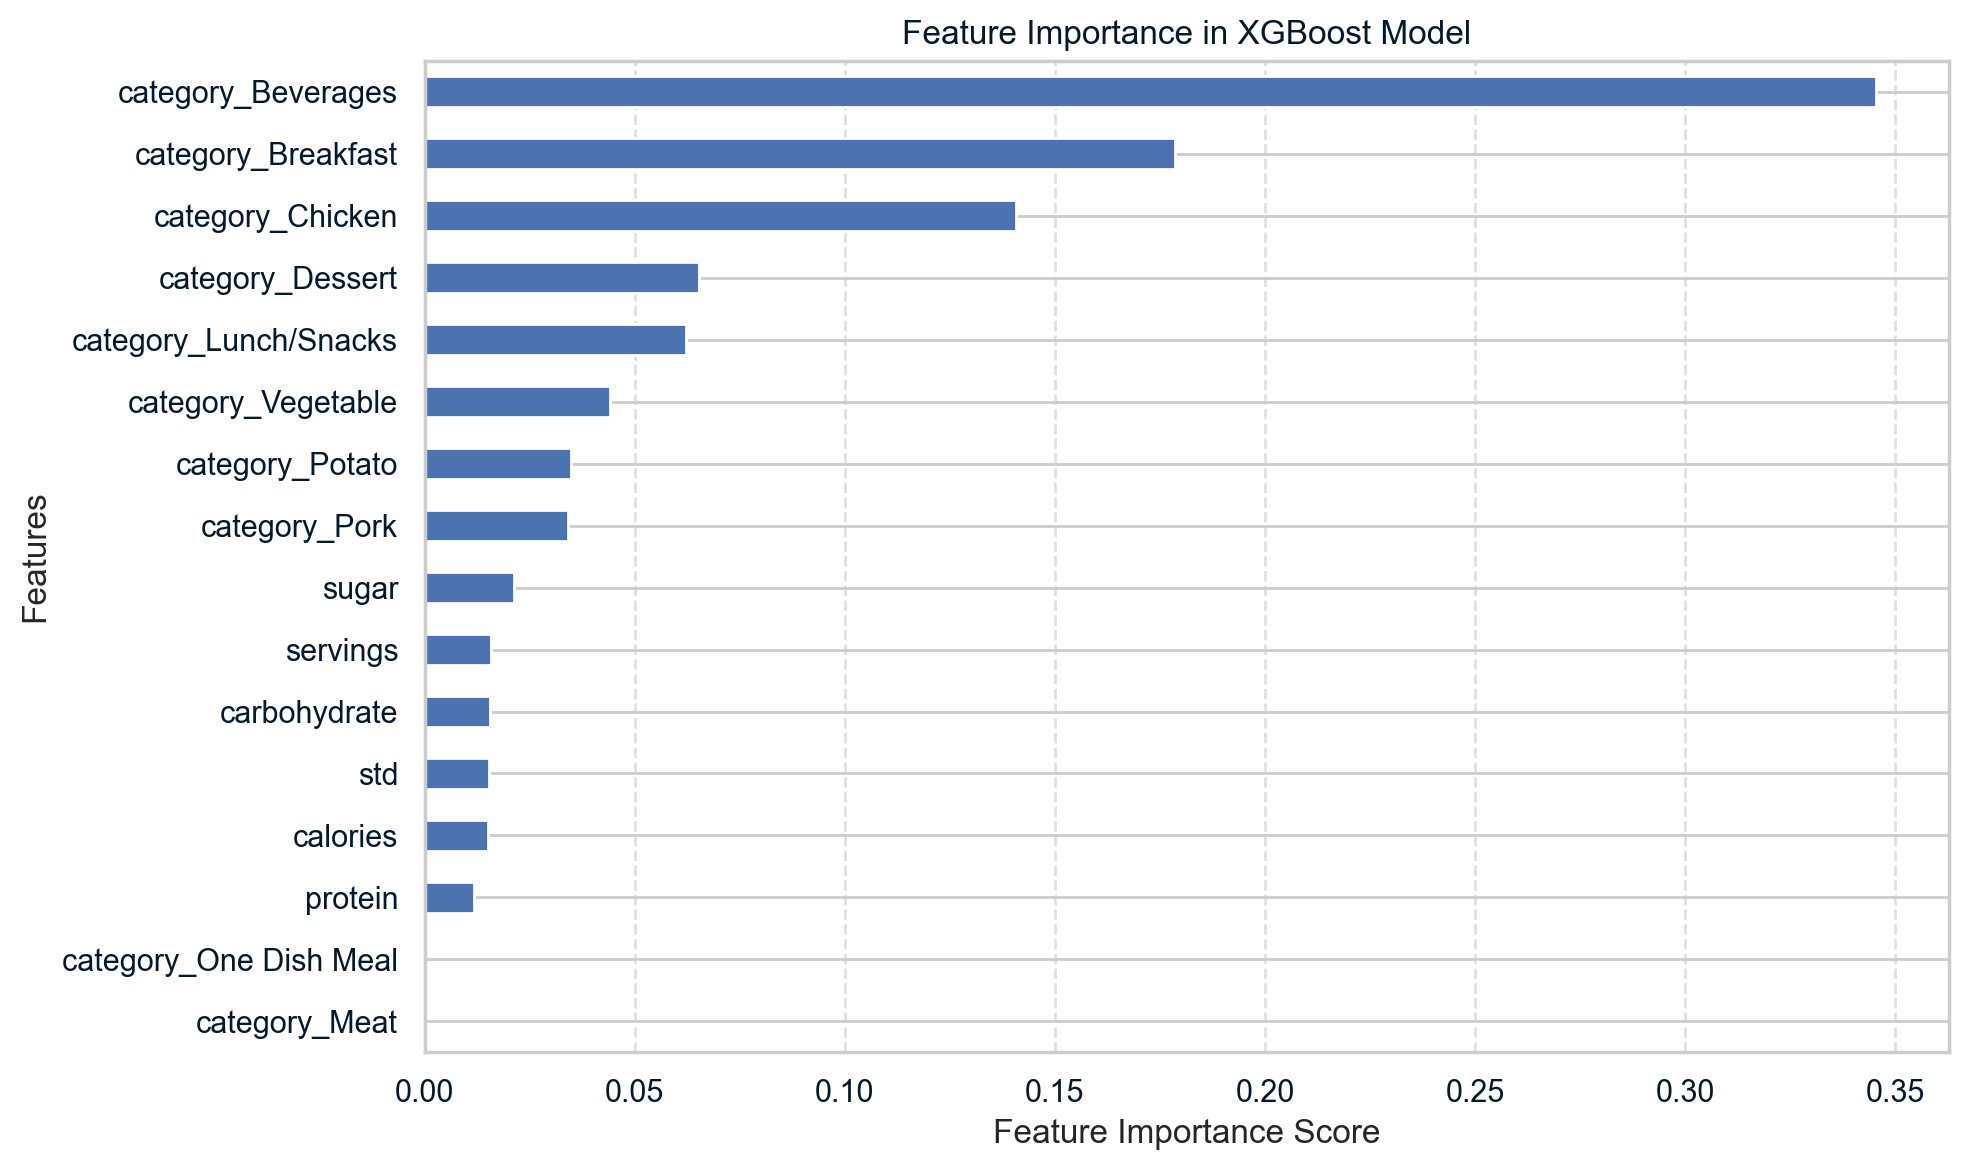

In [261]:
from xgboost import plot_importance

xgb_model = xgb.XGBClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=13,
        objective='binary:logistic',
        random_state=42,
        reg_lambda=0.2,  # L2 regularization
        reg_alpha=0.0  # L1 regularization
    )  
xgb_model.fit(X_train, y_train)

feature_importances = xgb_model.feature_importances_

feature_importances = pd.Series(feature_importances, index=column_order[:-1])

sorted_importances = feature_importances.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Model')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add a faint grid for better readability
plt.tight_layout()
plt.show()

# Business Metrics

### Business Goals :

1. Predict recipes with high traffic.
2. Achieve an 80% probability of predicting 'High' traffic for recipes.

None of the models could achieve the 80% accuracy mark, but Logistic Regression and XgBoost reached near 80% which is respectively 76.5% and 76%. 

### Performance of 2 models using KPI

Given the company's objective of increasing the prediction of high traffic, we can utilize the accuracy of predicting high traffic as a KPI to compare the two models. This metric assesses how effectively each model predicts instances of high traffic. A higher percentage on this metric signifies superior model performance. Based on this criterion, the Logistic Regression model demonstrates slightly better performance than the XGBoost model.

In [262]:
logistic_model = LogisticRegression(max_iter=1000, C=5)
logistic_model.fit(X_train, y_train)

# accuracy score on the train data
X_train_pred = logistic_model.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = logistic_model.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.7583798882681564
Accuracy score of the test data:  0.7653631284916201


In [263]:
xgb_model = xgb.XGBClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=13,
        objective='binary:logistic',
        random_state=42,
        reg_lambda=0.1,
        reg_alpha=0.5
    )

xgb_model.fit(X_train, y_train)

# accuracy score on the train data
X_train_pred = xgb_model.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = xgb_model.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.8421787709497207
Accuracy score of the test data:  0.7597765363128491


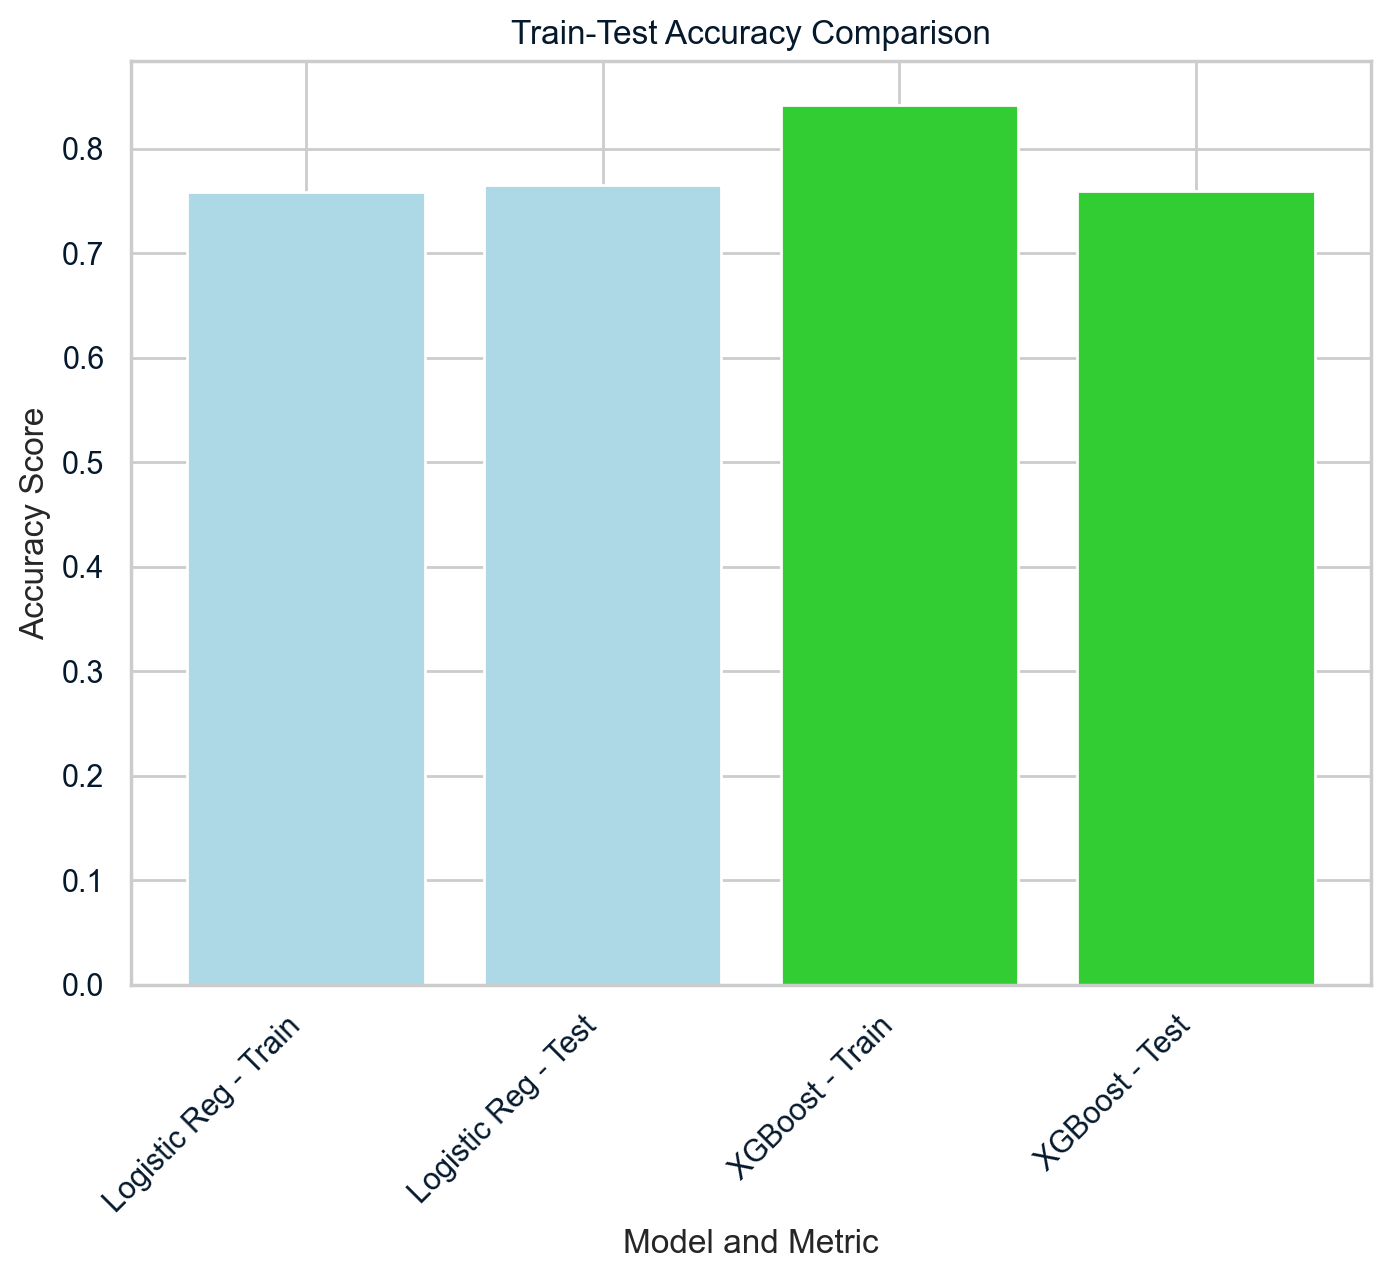

In [264]:
AccData = {
    'Model': ['Logistic Reg', 'Logistic Reg', 'XGBoost', 'XGBoost'],
    'Metric': ['Train', 'Test', 'Train', 'Test'],
    'Score': [0.7583798882681564, 0.7653631284916201, 0.8421787709497207, 0.7597765363128491]
}

# Create DataFrame
df = pd.DataFrame(AccData)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(df['Model'] + ' - ' + df['Metric'], df['Score'], color=['lightblue', 'lightblue', 'limegreen', 'limegreen'])
plt.xlabel('Model and Metric')
plt.ylabel('Accuracy Score')
plt.title('Train-Test Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

The chart compares the training and testing accuracies of two models: Logistic Regression and XGBoost. While XGBoost exhibits a higher training accuracy, it also shows a larger gap between training and testing accuracy, suggesting a higher risk of overfitting. In contrast, Logistic Regression demonstrates a smaller gap between training and testing accuracy, indicating better generalization performance. Therefore, despite having a slightly lower training accuracy, Logistic Regression might be a more suitable choice due to its lower risk of overfitting and better generalization capabilities.

# Summary

To assist Product Managers in predicting high-traffic recipes, we propose deploying a Logistic Regression model. Our analysis indicates that this model can accurately predict high traffic levels with approximately 89% accuracy. This level of predictive power can significantly boost the Product Manager's confidence in generating increased traffic across the website.

To ensure the ongoing success and effectiveness of our model, we recommend the following steps:

**Deployment Strategy:** Explore and implement a robust deployment strategy that prioritizes performance and cost-effectiveness. Evaluate options such as edge device deployment for enhanced convenience and security. Conduct thorough testing with newly hired product analysts to ensure seamless integration and real-world applicability.

**Regular Model Retraining:** Implement a system for consistent and scheduled model retraining. As user preferences and trends evolve, retraining the model with updated data is crucial for maintaining high predictive accuracy and ensuring the model remains relevant.

**Data Enrichment:** Expand the dataset by collecting additional features such as time to make, cost per serving, ingredients, site duration time, referring websites, and combinations of recipes viewed in a single session. This enriched data will provide the model with a more comprehensive understanding of user behavior and preferences.

**Class Imbalance Mitigation:** To address the class imbalance between low and high-traffic recipes, we recommend strategies such as collecting more data for low-traffic recipes or employing data augmentation techniques to balance the dataset. This will improve the model's ability to accurately predict low-traffic recipes and enhance overall performance.

By following these recommendations, we can ensure the continued effectiveness and value of the Logistic Regression model in predicting high-traffic recipes and driving increased website traffic for the company.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation